In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate
from scipy import stats

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('properties.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12685 entries, 0 to 12684
Columns: 145 entries, ID to Pantry Type
dtypes: float64(12), int64(93), object(40)
memory usage: 14.0+ MB


In [8]:
df.columns

Index(['ID', 'Possession Status', 'Availability Starts From', 'Floor No',
       'Commercial', 'Developer', 'Approved Authority Name', 'Units Available',
       'Price', 'Price (English)',
       ...
       'Rentable CommuniPfty Space', 'Retail Boulevard (Retail Shops)',
       'Cycling & Jogging Track', 'Fire Fighting Equipment',
       'Aesthetically designed landscape garden', 'Possession By', 'NRI Pref',
       'Land Area / Covered Area', 'Land Area Unit', 'Pantry Type'],
      dtype='object', length=145)

In [9]:
df.describe()

,ID,Units Available,Price,Maintenance Charges,Booking Amount,Covered Area,sqft Price,Carpet Area,Bathroom,bedroom,...,Meditation Area,Multipurpose Courts,Recreational Pool,Rentable CommuniPfty Space,Retail Boulevard (Retail Shops),Cycling & Jogging Track,Fire Fighting Equipment,Aesthetically designed landscape garden,Land Area / Covered Area,Land Area Unit
count,12685.000000,6135.000000,1.260100e+04,6.283000e+03,7.701000e+03,11374.000000,1.148000e+04,10133.000000,12616.000000,12685.000000,...,12685.000000,12685.000000,12685.000000,12685.000000,12685.000000,12685.000000,12685.000000,12685.000000,84.000000,86.000000
mean,6343.000000,7.751589,2.640261e+07,9.076812e+03,8.101702e+05,1037.746439,2.243507e+04,819.201224,2.143389,1.987150,...,0.540402,0.540323,0.536539,0.536855,0.537958,0.540166,0.544028,0.536382,7248.869048,12847.825581
std,3661.988417,26.335448,3.653648e+08,2.399983e+05,2.997549e+06,727.327389,3.187654e+05,585.037811,0.926965,0.943404,...,0.498385,0.498391,0.498683,0.498660,0.498577,0.498404,0.498077,0.498694,18240.893916,10.643078
min,1.000000,0.000000,1.000000e+05,0.000000e+00,0.000000e+00,10.000000,0.000000e+00,2.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,12800.000000
25%,3172.000000,0.000000,7.000000e+06,1.000000e+01,1.000000e+05,605.500000,1.000000e+04,468.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,792.500000,12850.000000
50%,6343.000000,1.000000,1.350000e+07,2.500000e+03,5.000000e+05,850.000000,1.634850e+04,671.000000,2.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2000.000000,12850.000000
75%,9514.000000,5.000000,2.550000e+07,6.000000e+03,9.000000e+05,1200.000000,2.461500e+04,950.000000,2.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3392.500000,12850.000000
max,12685.000000,750.000000,4.080000e+10,1.768000e+07,1.050000e+08,15006.000000,3.400000e+07,20870.000000,10.000000,6.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100000.000000,12853.000000


# Pre-processing

In [10]:
df = df.sort_values(by='Price')

In [11]:
df = df.dropna(subset=["Price"])

In [12]:
z_scores = stats.zscore(df['Price'])
df = df[abs(z_scores) <= 3]

In [13]:
mask = (df['Possession Status'] == 'Ready to Move') | (df['Possession Status'] == 'Under Construction') | (df['Possession Status'] == 'Immediately')
df.loc[~mask, 'Availability Starts From'] = df.loc[~mask, 'Possession Status']
df.loc[~mask, 'Possession Status'] = 'Under Construction'
df.loc[df['Possession Status'] == 'Immediately', 'Possession Status'] = 'Ready to Move'
df['Availability Starts (Date)'] = pd.to_datetime(df['Availability Starts From'], format="%b '%y")

In [1]:
class Plotter:
  def plot_price_categories_by_summary_table(ax, df, title):
    category_order = ['low', 'medium', 'high']
    colors = {'low': 'green', 'medium': 'orange', 'high': 'red'}

    sns.barplot(data=df, x='Price Category', y='Count', hue='Price Category', palette=colors, order=category_order, ax=ax, width=0.3)
    for i in ax.containers:
      ax.bar_label(i,)
    # sns.countplot(data=df, x='Price Category', hue="Price Category", palette=colors, order=category_order, ax=ax)
    
    ax.set_title(title)
    ax.set_xlabel('Price Category')
    ax.set_ylabel('Count of Properties')
    # ax.set_ylim(0, max(df['Count']) + 5)
    
    # plt.ylim(0, max(subset['Count']) + 5)  # Adjust y-limit for better visualization
    plt.tight_layout()

  def plot_bar_plot(ax, df, title, x, y):
    sns.barplot(data=df, x=x, y=y, ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_title(title)
    ax.set_xlabel(x)
    ax.set_ylabel(y)
  
  def plot_multi_bar_plot(ax, df, title, target_column):
    pivot_df = df.pivot(index=target_column, columns='Price Category', values='Count').fillna(0)

    pivot_df.plot(kind='bar', ax=ax)

    # Labels and title
    ax.set_xlabel('Cities')
    ax.set_ylabel('Count')
    ax.set_title(title)
    ax.legend(title='Price Category')

  def plot_multi_bar_plot_2(ax, df, title, target_column_1, target_column_2):
    pivot_df = df.pivot(index=target_column_1, columns=target_column_2, values='Count').fillna(0)

    pivot_df.plot(kind='bar', ax=ax)

    # Labels and title
    ax.set_xlabel(target_column_1)
    ax.set_ylabel('Count')
    ax.set_title(title)
    ax.legend(title=target_column_2)

  def plot_comparison_bar(df, x_col, y_cols, title, x_label, y_label, legend_title, ax=None, colors=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 6))
    melted_df = df.melt(id_vars=[x_col], value_vars=y_cols.keys(), var_name=legend_title, value_name=y_label)
    sns.barplot(data=melted_df, x=x_col, y=y_label, hue=legend_title, ax=ax, palette=colors)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.legend(title=legend_title)
    plt.tight_layout()

  def plot_pie_per_price_category(ax, category, df, title, target_field):
    ax.pie(df['Count'], labels=df[target_field] + ' (' + df['Count'].astype(str) + ')')
    ax.set_title(title)
  
  def plot_pie_chart(ax, df, title, target_field):
    ax.pie(df['Count'], labels=df[target_field] + ' (' + df['Count'].astype(str) + ')')
    ax.set_title(title)
  
  def plot_box_plot(ax, df, title, target_field_1, target_field_2):
    sns.boxplot(x=target_field_1, y=target_field_2, data=df, ax=ax, showfliers=False, showmeans=True, meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black"},palette='Set3')
    # sns.swarmplot(x=target_field_1, y=target_field_2, data=df, ax=ax, color='black', size=3)
    ax.set_title(title)

  def plot_scatter_plot(ax, df, title, target_field_1, target_field_2,label_name,legend_title):
    sns.scatterplot(x=target_field_1, y=target_field_2, data=df, ax=ax,alpha=0.5,label=label_name)
    ax.set_title(title)
    ax.set_xlabel(target_field_1)
    ax.set_ylabel(target_field_2)
    ax.legend(title=legend_title)
    plt.tight_layout()

  def plot_kde_plot(ax, df, title, target_field,label_name,legend_title):
    sns.kdeplot(data=df, x=target_field, ax=ax, fill=True,palette='viridis',label=label_name)
    ax.set_title(title)
    ax.set_xlabel(target_field)
    ax.set_ylabel('Density')
    ax.legend(title=legend_title)
    plt.tight_layout()
    
  def plot_violin_plot(ax, df, title, target_field_1, target_field_2):
    sns.violinplot(x=target_field_1, y=target_field_2, data=df, ax=ax,palette='Set3')
    # sns.swarmplot(x=target_field_1, y=target_field_2, data=df, ax=ax, color='black', size=3)
    ax.set_title(title)
    
  def plot_multi_violin_plot(ax, df, title, target_field_1, target_field_2, hue_field):
    sns.violinplot(x=target_field_1, y=target_field_2, hue=hue_field, data=df, ax=ax,palette='Set3')
    # sns.swarmplot(x=target_field_1, y=target_field_2, data=df, ax=ax, color='black', size=3)
    ax.set_title(title)

In [14]:
def get_summary_table(df, group_by_column):
  summary_table = df.groupby([group_by_column, 'Price Category']).agg({
      'Price': ['count']
  }).reset_index()

  summary_table.columns = [group_by_column, 'Price Category', 'Count']

  category_order = ['low', 'medium', 'high']
  summary_table['Price Category'] = pd.Categorical(summary_table['Price Category'], categories=category_order, ordered=True)

  summary_table = summary_table.sort_values([group_by_column, 'Price Category']).reset_index(drop=True)
  
  unique_values_in_group_by_column = summary_table[group_by_column].unique()

  return summary_table, unique_values_in_group_by_column

def get_summary_table_with_masked_column(df, mask_on_column, target_value):
  subset = df[df[mask_on_column] == target_value]

  summary_table = subset.groupby(['Price Category']).agg({
      'Price': ['count']
  }).reset_index()

  summary_table.columns = ['Price Category', 'Count']

  category_order = ['low', 'medium', 'high']
  summary_table['Price Category'] = pd.Categorical(summary_table['Price Category'], categories=category_order, ordered=True)

  summary_table = summary_table.sort_values(['Price Category']).reset_index(drop=True)

  return summary_table

def get_count_table(df, group_by_columns):
  summary_table = df.groupby(group_by_columns).agg({
      'Price': ['count']
  }).reset_index()

  summary_table.columns = [*group_by_columns, 'Count']

  summary_table = summary_table.sort_values(group_by_columns).reset_index(drop=True)

  unique_elements = [summary_table[col].unique() for col in group_by_columns]

  return summary_table, unique_elements

def get_full_data_summary(df, group_by_columns, target_variable):
  summary_table = df.groupby(group_by_columns).agg({
      target_variable: ['mean', 'median', 'count']
  }).reset_index()

  summary_table.columns = [*group_by_columns, f'{target_variable} (Mean)', f'{target_variable} (Median)', 'Count']

  summary_table = summary_table.sort_values(group_by_columns).reset_index(drop=True)

  return summary_table

# Task 1
```
As investors have diverse budget limits, split the overall opportunities into three different price ranges. Analyze the distribution of these price ranges across cities. (5 Marks)
```

In [15]:
low_threshold = df['Price'].quantile(0.33)
high_threshold = df['Price'].quantile(0.66)

def categorize_price(price):
    if price < low_threshold:
        return 'low'
    elif price < high_threshold:
        return 'medium'
    else:
        return 'high'
    
df['Price Category'] = df['Price'].apply(categorize_price)

summary_table = df.groupby('Price Category').agg({
    'Price': ['mean', 'std', 'min', 'max', 'count']
}).reset_index()

summary_table.columns = ['Price Category', 'Mean', 'Std Dev', 'Min', 'Max', 'Count']

category_order = ['low', 'medium', 'high']
summary_table['Price Category'] = pd.Categorical(summary_table['Price Category'], categories=category_order, ordered=True)
summary_table = summary_table.sort_values('Price Category').reset_index(drop=True)
print(tabulate(summary_table, headers='keys', tablefmt='pretty'))

+---+----------------+--------------------+--------------------+------------+-------------+-------+
|   | Price Category |        Mean        |      Std Dev       |    Min     |     Max     | Count |
+---+----------------+--------------------+--------------------+------------+-------------+-------+
| 0 |      low       | 5138200.357056695  | 2029363.1047203515 |  100000.0  |  8650000.0  | 4145  |
| 1 |     medium     | 13541293.728036486 | 3216797.692059702  | 8700000.0  | 19780000.0  | 4166  |
| 2 |      high      | 49297685.41021455  | 40240873.72245748  | 19800000.0 | 450000000.0 | 4288  |
+---+----------------+--------------------+--------------------+------------+-------------+-------+


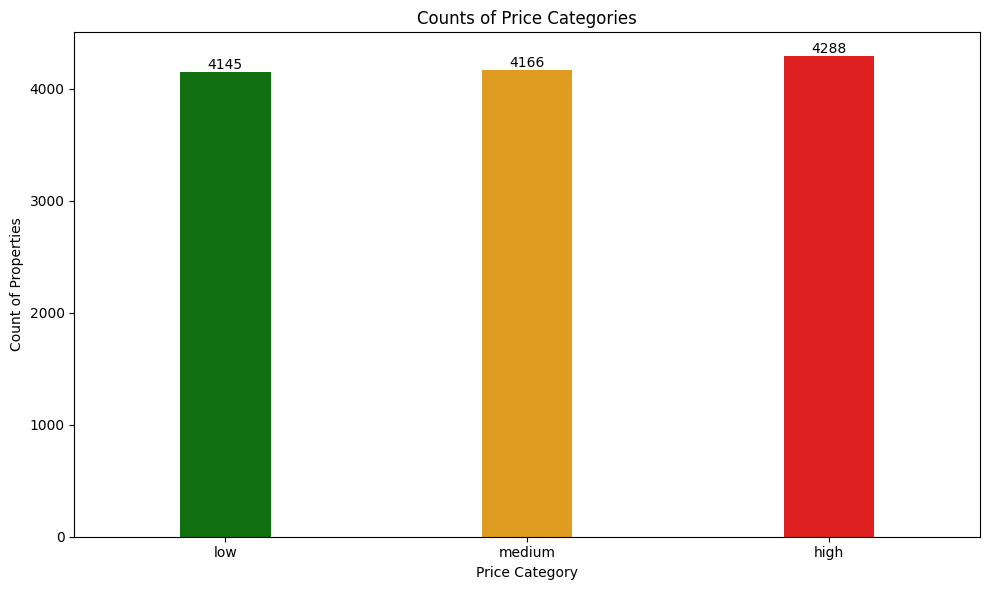

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))
Plotter.plot_price_categories_by_summary_table(ax, summary_table, title='Counts of Price Categories')
plt.show()

+----+-----------+----------------+-------+
|    |   City    | Price Category | Count |
+----+-----------+----------------+-------+
| 0  | Agartala  |      low       |   1   |
| 1  | Bhiwandi  |      low       |   2   |
| 2  |  Gurgaon  |      low       |   1   |
| 3  | Hyderabad |      low       |   8   |
| 4  |  Kalyan   |      low       |   7   |
| 5  |  Kalyan   |     medium     |   2   |
| 6  |  Mumbai   |      low       | 2026  |
| 7  |  Mumbai   |     medium     | 2604  |
| 8  |  Mumbai   |      high      | 3863  |
| 9  |  Nagpur   |      low       |   5   |
| 10 |  Nagpur   |     medium     |   2   |
| 11 |  Palghar  |      low       |   2   |
| 12 |   Thane   |      low       | 2093  |
| 13 |   Thane   |     medium     | 1558  |
| 14 |   Thane   |      high      |  425  |
+----+-----------+----------------+-------+


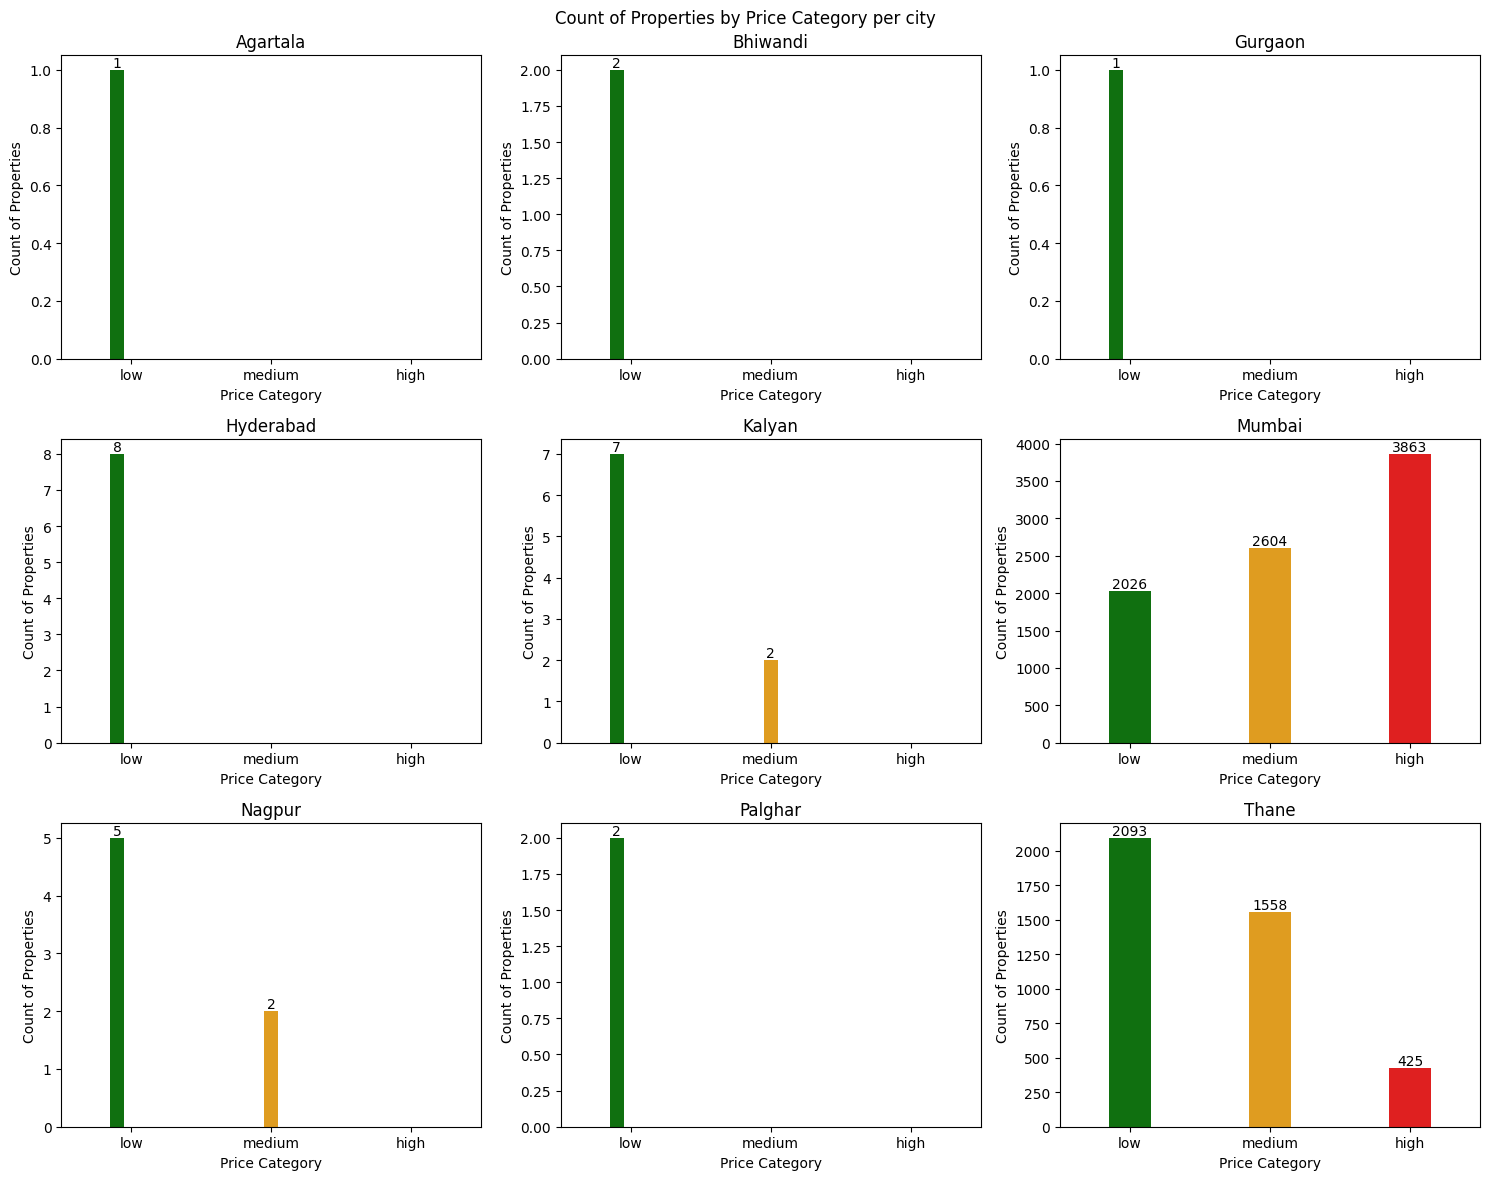

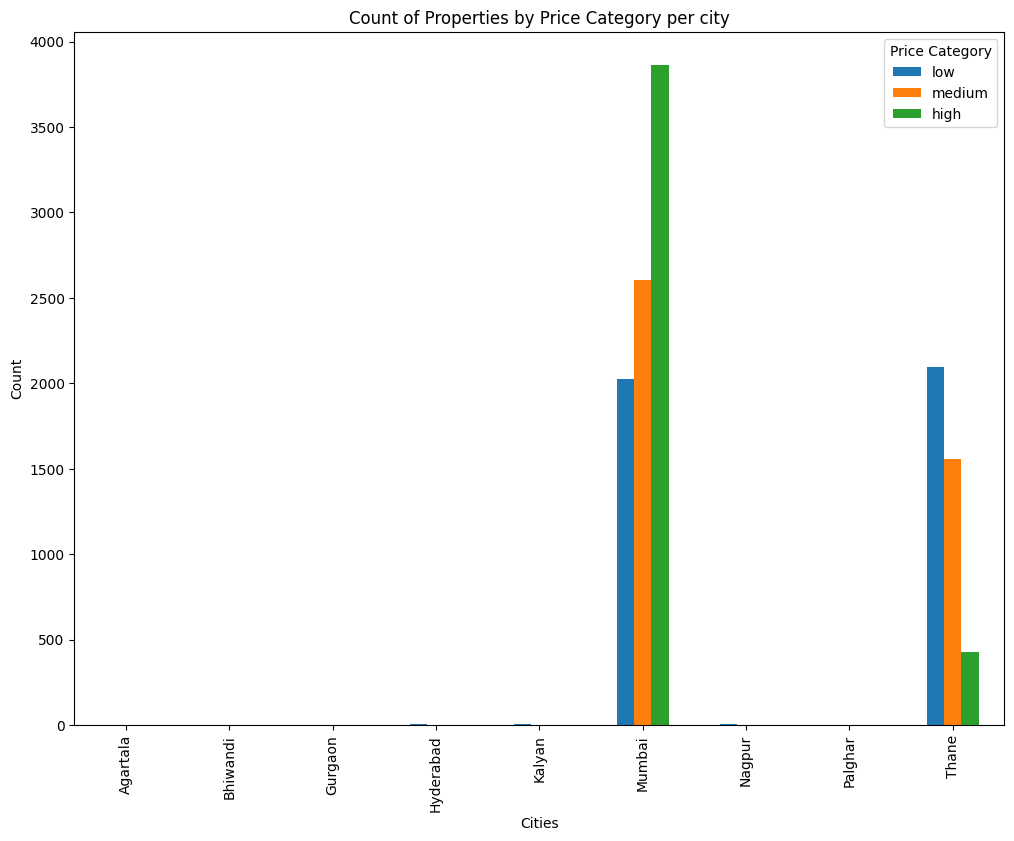

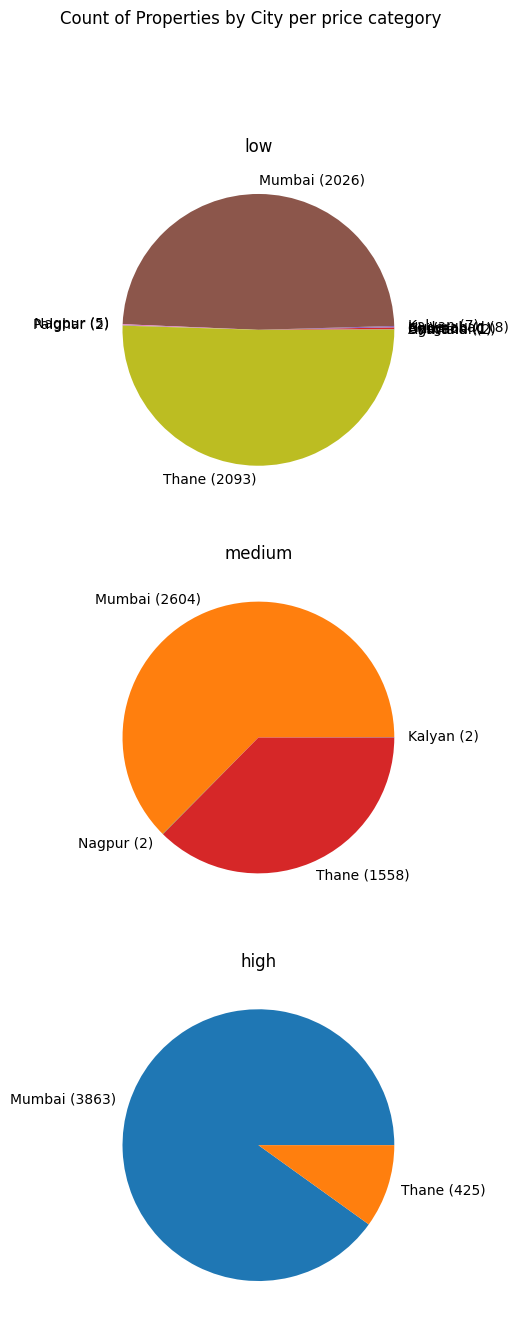

In [17]:
summary_table, cities = get_summary_table(df, group_by_column='City')

print(tabulate(summary_table, headers='keys', tablefmt='pretty'))


fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()
fig.suptitle('Count of Properties by Price Category per city')

for (ax, city) in zip(axes,cities):
    subset = summary_table[summary_table['City'] == city]
    Plotter.plot_price_categories_by_summary_table(ax, subset, title=f'{city}')

plt.show()

# Multibar plot
fig, ax = plt.subplots(figsize=(12, 9))
Plotter.plot_multi_bar_plot(ax, summary_table, title='Count of Properties by Price Category per city', target_column='City')
plt.show()

# Pie charts
fig, axes = plt.subplots(3, 1, figsize=(6, 15))
axes = axes.flatten()
fig.suptitle('Count of Properties by City per price category')

for (ax, category) in zip(axes,['low', 'medium', 'high']):
    subset = summary_table[summary_table['Price Category'] == category]
    Plotter.plot_pie_per_price_category(ax, category=category, df=subset, title=f'{category}', target_field='City')

plt.show()

# Task 2
```
Provide investors with a high-level summary of the whole data using the price range dimensions. Consider factors like property type, city, and key amenities. What method/tool would you use to present this information effectively? (5 Marks)
```

+----+-------------------------+----------------+-------+
|    |    Type of Property     | Price Category | Count |
+----+-------------------------+----------------+-------+
| 0  |        Apartment        |      low       | 3858  |
| 1  |        Apartment        |     medium     | 4064  |
| 2  |        Apartment        |      high      | 4113  |
| 3  | Builder Floor Apartment |      low       |  145  |
| 4  | Builder Floor Apartment |     medium     |  38   |
| 5  | Builder Floor Apartment |      high      |  22   |
| 6  |        Penthouse        |      low       |   1   |
| 7  |        Penthouse        |     medium     |   2   |
| 8  |        Penthouse        |      high      |  35   |
| 9  |    Residential House    |      low       |  126  |
| 10 |    Residential House    |     medium     |  53   |
| 11 |    Residential House    |      high      |  63   |
| 12 |          Villa          |      low       |  15   |
| 13 |          Villa          |     medium     |   9   |
| 14 |        

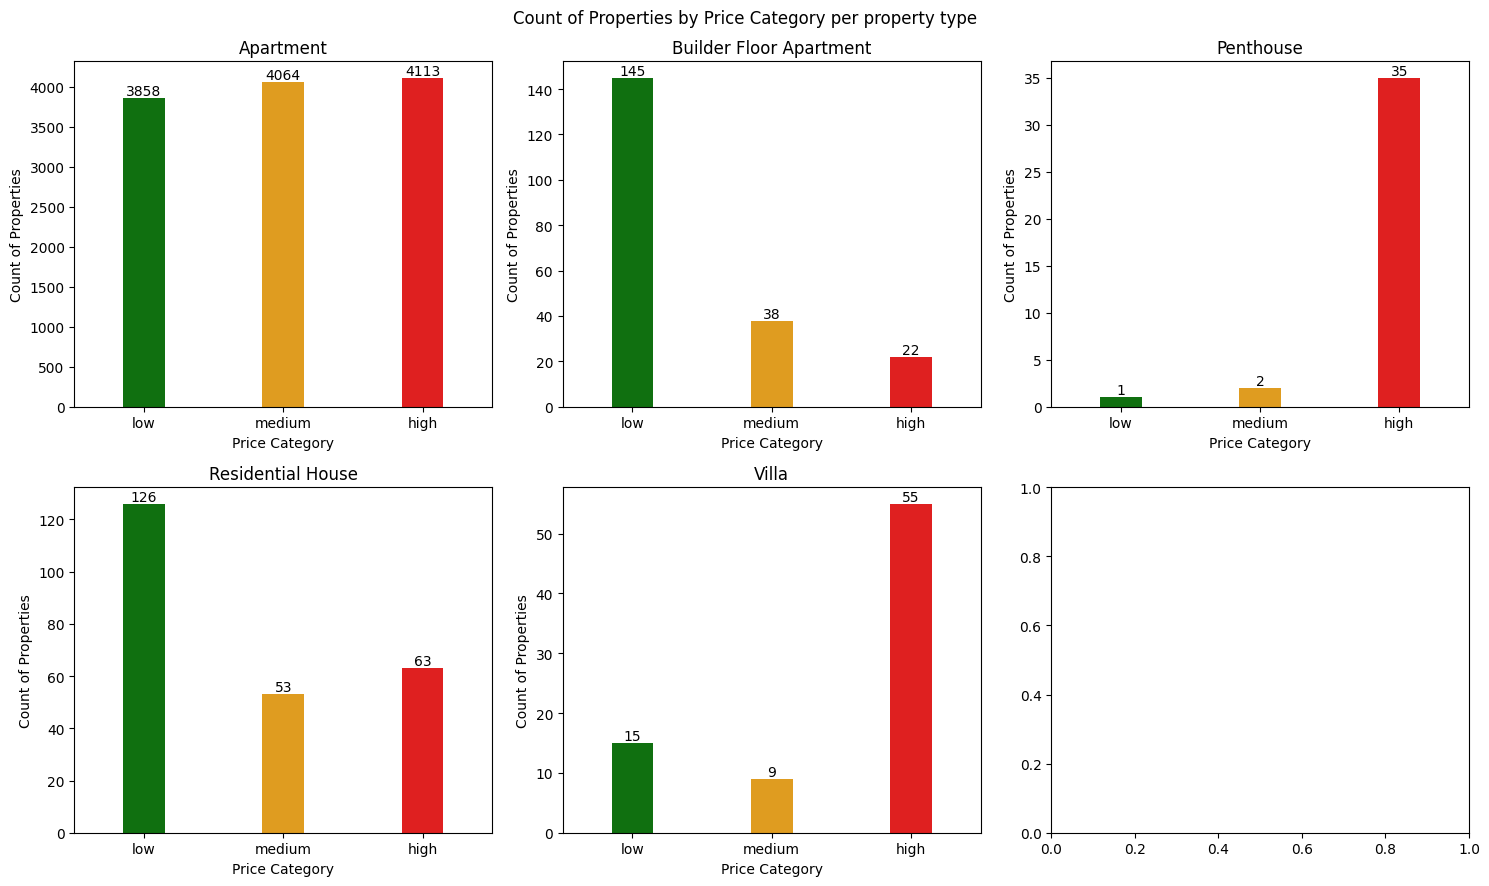

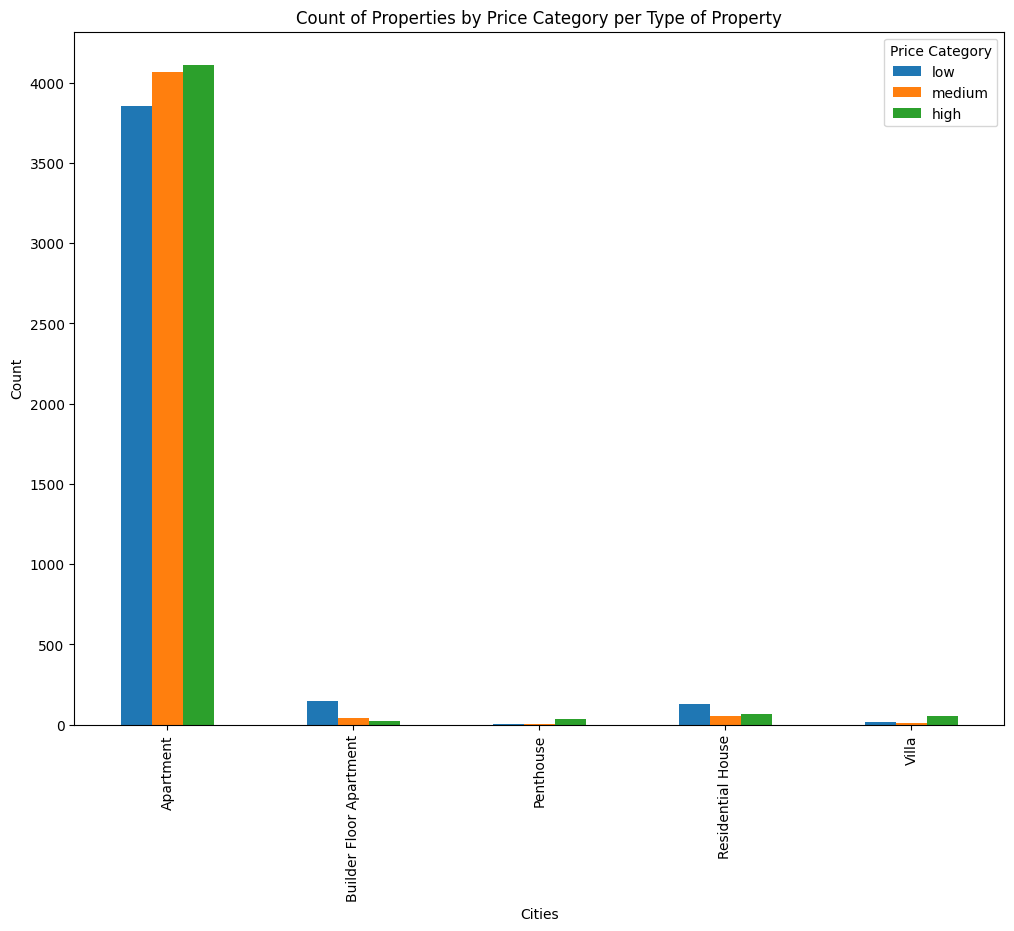

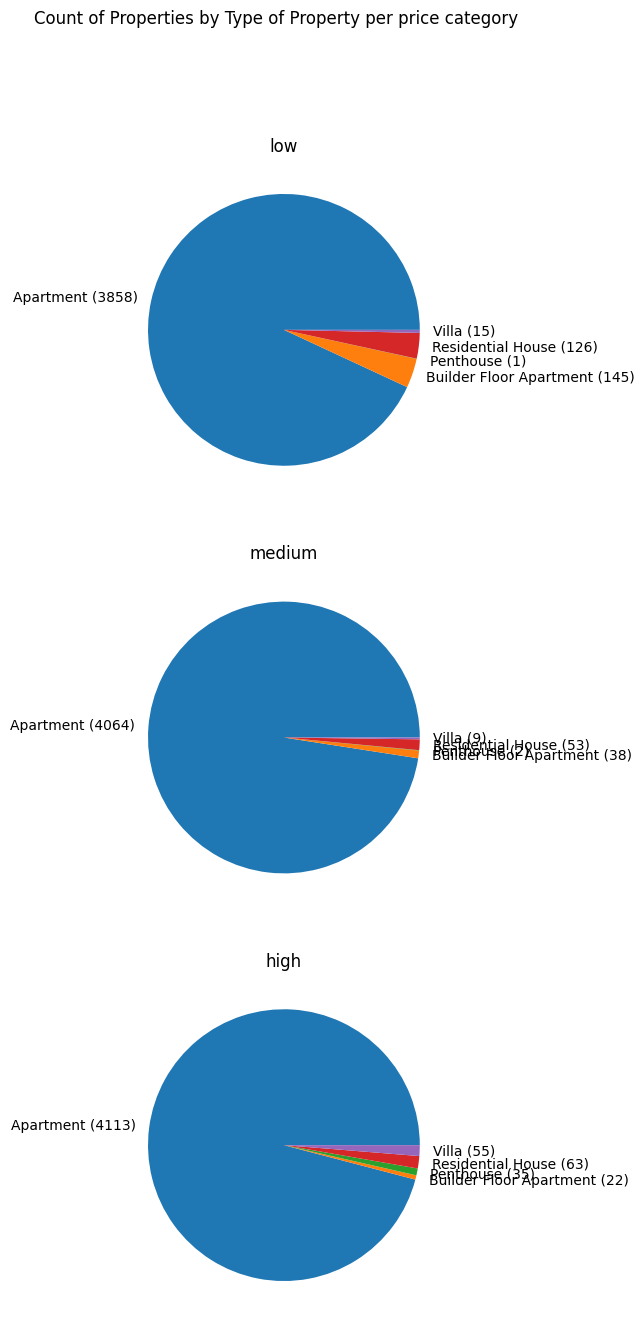

In [18]:
summary_table, property_types = get_summary_table(df,group_by_column='Type of Property')

print(tabulate(summary_table, headers='keys', tablefmt='pretty'))
    
fig, axes = plt.subplots(2, 3, figsize=(15, 9))
axes = axes.flatten()
fig.suptitle('Count of Properties by Price Category per property type')

for (ax, property_type) in zip(axes,property_types):
    subset = summary_table[summary_table['Type of Property'] == property_type]
    Plotter.plot_price_categories_by_summary_table(ax, subset, title=f'{property_type}')

plt.show()

# Multibar plot
fig, ax = plt.subplots(figsize=(12, 9))
Plotter.plot_multi_bar_plot(ax, summary_table, title='Count of Properties by Price Category per Type of Property', target_column='Type of Property')
plt.show()

# Pie charts
fig, axes = plt.subplots(3, 1, figsize=(6, 15))
axes = axes.flatten()
fig.suptitle('Count of Properties by Type of Property per price category')

for (ax, category) in zip(axes,['low', 'medium', 'high']):
    subset = summary_table[summary_table['Price Category'] == category]
    Plotter.plot_pie_per_price_category(ax, category=category, df=subset, title=f'{category}', target_field='Type of Property')

plt.show()

+----+-----------+----------------+-------+
|    |   City    | Price Category | Count |
+----+-----------+----------------+-------+
| 0  | Agartala  |      low       |   1   |
| 1  | Bhiwandi  |      low       |   2   |
| 2  |  Gurgaon  |      low       |   1   |
| 3  | Hyderabad |      low       |   8   |
| 4  |  Kalyan   |      low       |   7   |
| 5  |  Kalyan   |     medium     |   2   |
| 6  |  Mumbai   |      low       | 2026  |
| 7  |  Mumbai   |     medium     | 2604  |
| 8  |  Mumbai   |      high      | 3863  |
| 9  |  Nagpur   |      low       |   5   |
| 10 |  Nagpur   |     medium     |   2   |
| 11 |  Palghar  |      low       |   2   |
| 12 |   Thane   |      low       | 2093  |
| 13 |   Thane   |     medium     | 1558  |
| 14 |   Thane   |      high      |  425  |
+----+-----------+----------------+-------+


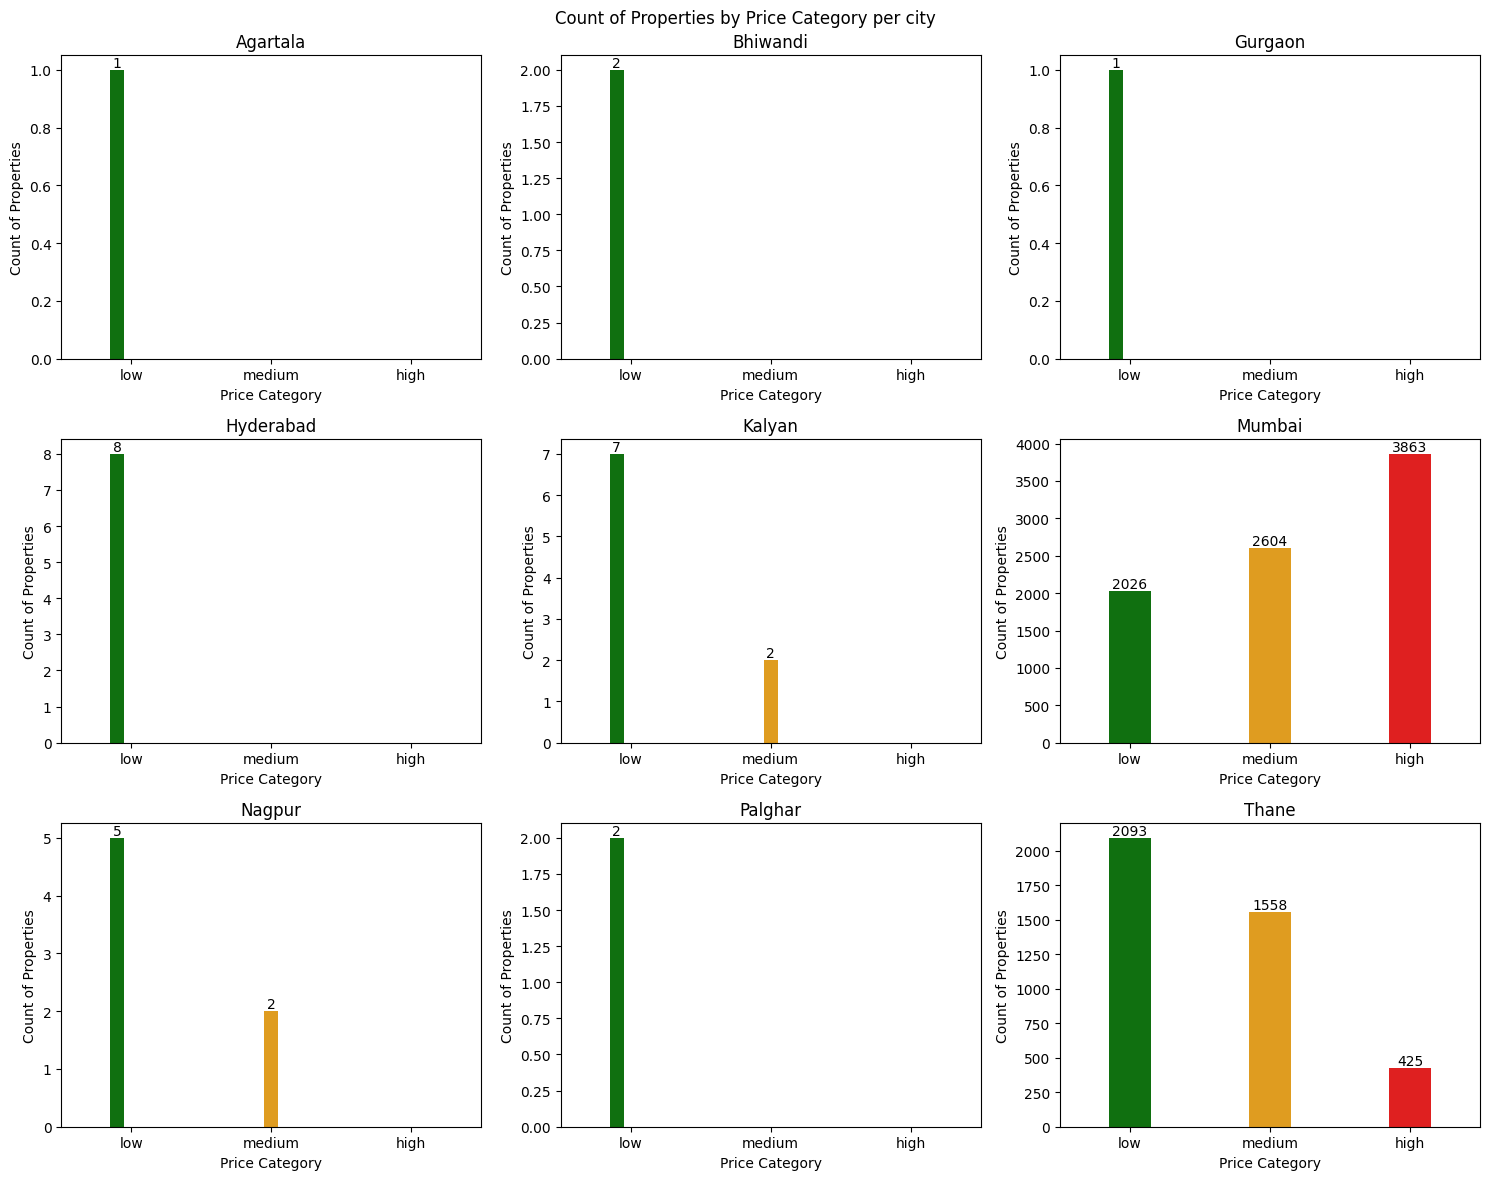

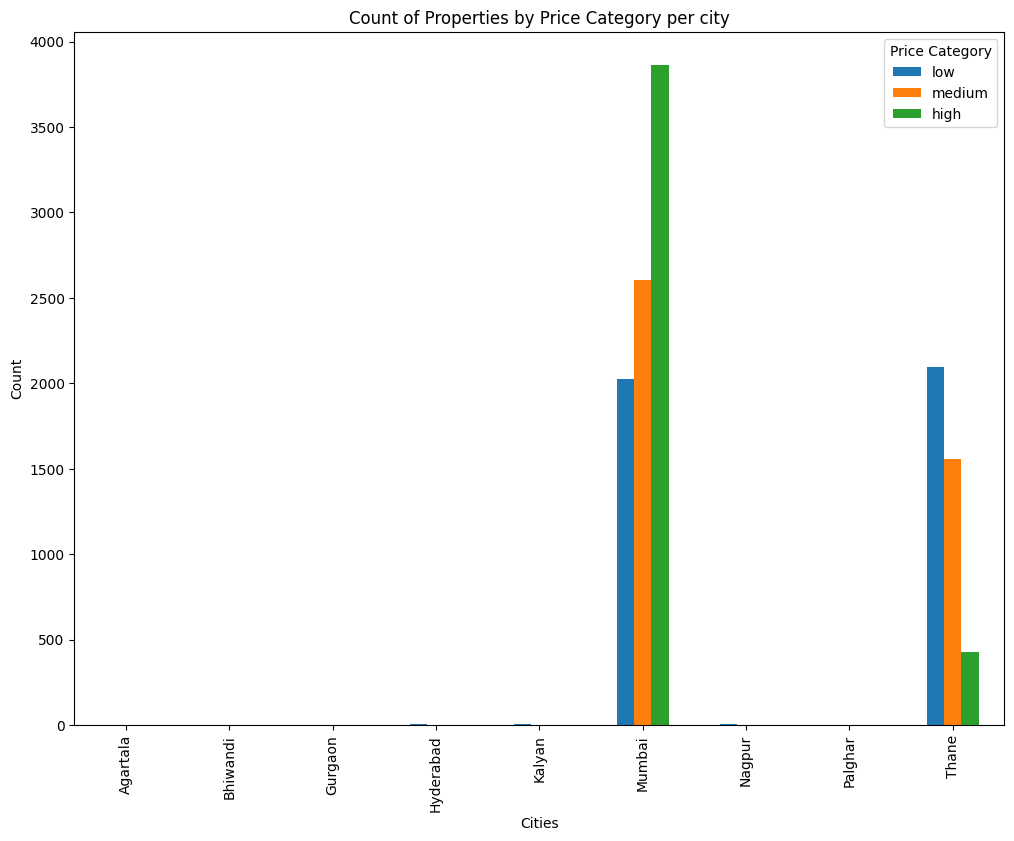

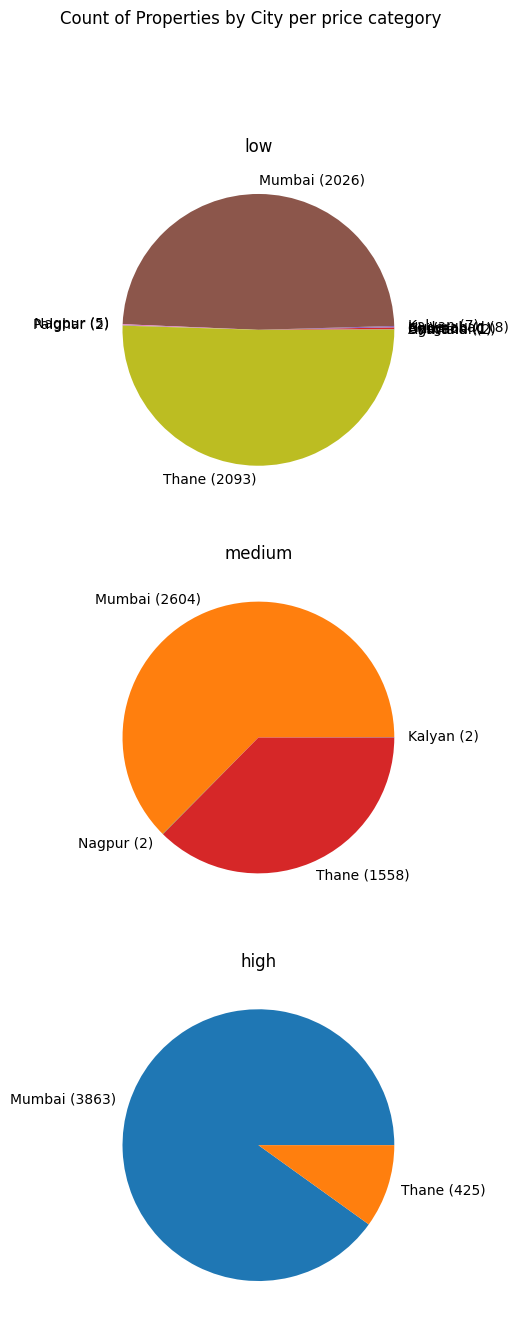

In [19]:
summary_table, cities = get_summary_table(df, group_by_column='City')

print(tabulate(summary_table, headers='keys', tablefmt='pretty'))


fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()
fig.suptitle('Count of Properties by Price Category per city')

for (ax, city) in zip(axes,cities):
    subset = summary_table[summary_table['City'] == city]
    Plotter.plot_price_categories_by_summary_table(ax, subset, title=f'{city}')

plt.show()

# Multibar plot
fig, ax = plt.subplots(figsize=(12, 9))
Plotter.plot_multi_bar_plot(ax, summary_table, title='Count of Properties by Price Category per city', target_column='City')
plt.show()

# Pie charts
fig, axes = plt.subplots(3, 1, figsize=(6, 15))
axes = axes.flatten()
fig.suptitle('Count of Properties by City per price category')

for (ax, category) in zip(axes,['low', 'medium', 'high']):
    subset = summary_table[summary_table['Price Category'] == category]
    Plotter.plot_pie_per_price_category(ax, category=category, df=subset, title=f'{category}', target_field='City')

plt.show()

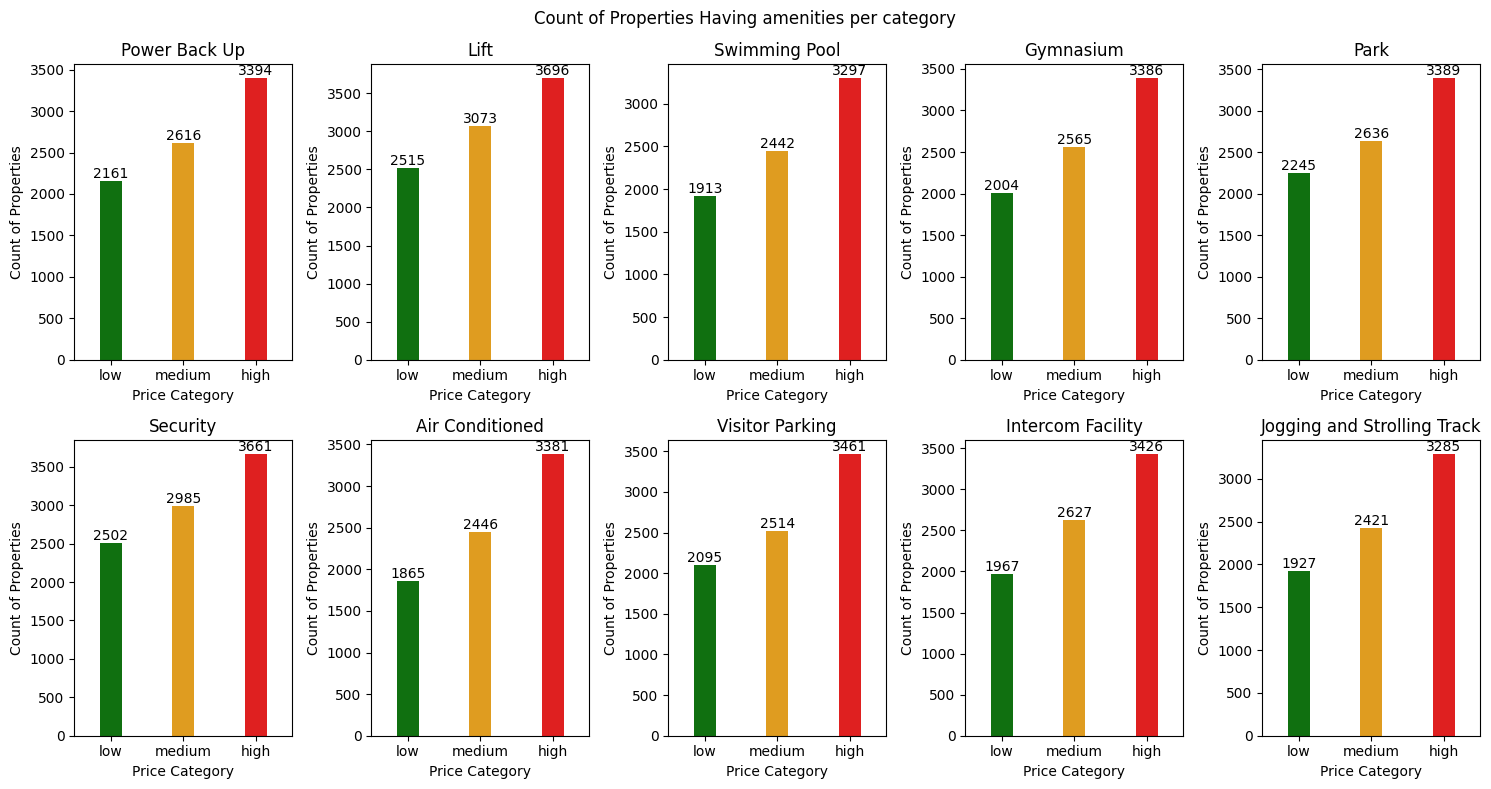

In [20]:
amenities_list = [
  'Power Back Up',
  'Lift',
  'Swimming Pool',
  'Gymnasium',
  'Park',
  'Security',
  'Air Conditioned',
  'Visitor Parking',
  'Intercom Facility',
  'Jogging and Strolling Track',
]

fig, axes = plt.subplots(2, 5, figsize=(15, 8))
axes = axes.flatten()
fig.suptitle('Count of Properties Having amenities per category')

for (ax, amenity) in zip(axes, amenities_list):
    summary_table = get_summary_table_with_masked_column(df, amenity, 1)
    Plotter.plot_price_categories_by_summary_table(ax, df=summary_table, title=f"{amenity}")

plt.show()

# Task 3

`Some investors want to compare investment opportunities in Thane and Mumbai. Analyze and visualize
the differences in property types, sizes (using Carpet Area), and prices between these two cities.`

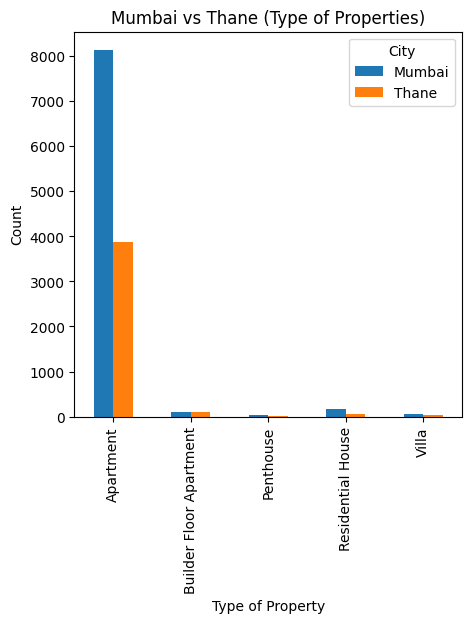

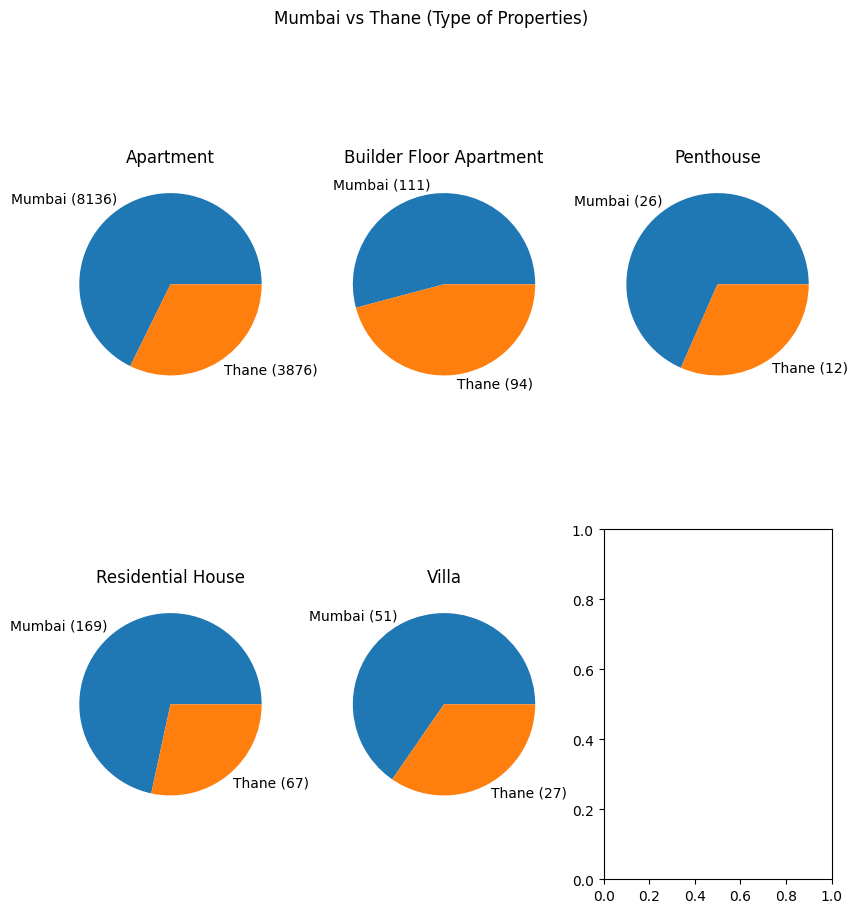

In [21]:
subset = df[(df['City'] == 'Thane') | (df['City'] == 'Mumbai')]

summary_table, [_, property_types] = get_count_table(subset, ['City', 'Type of Property'])

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
Plotter.plot_multi_bar_plot_2(ax, summary_table, 
                              title='Mumbai vs Thane (Type of Properties)',
                              target_column_1='Type of Property',
                              target_column_2='City'
                              )

fig, axes = plt.subplots(2, 3, figsize=(10, 10))
axes = axes.flatten()
fig.suptitle('Mumbai vs Thane (Type of Properties)')

for (ax, property_type) in zip(axes, property_types):
  subset = summary_table[summary_table['Type of Property'] == property_type]
  Plotter.plot_pie_chart(ax, subset, title=f'{property_type}', target_field='City')
  
plt.show()

+---+--------+--------------------+----------------------+-------+
|   |  City  | Carpet Area (Mean) | Carpet Area (Median) | Count |
+---+--------+--------------------+----------------------+-------+
| 0 | Mumbai |  875.824820599409  |        700.0         | 7107  |
| 1 | Thane  | 684.9486404833837  |        620.0         | 2979  |
+---+--------+--------------------+----------------------+-------+


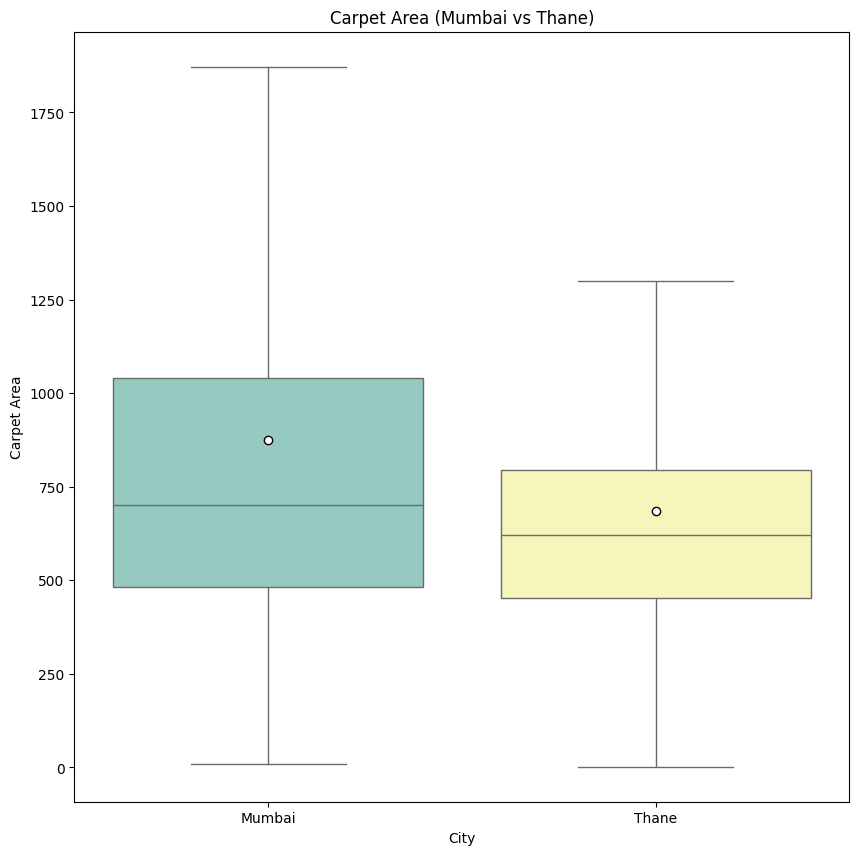

In [22]:
subset = df[(df['City'] == 'Thane') | (df['City'] == 'Mumbai')]

summary_table = get_full_data_summary(df=subset, group_by_columns=['City'], target_variable='Carpet Area')
print(tabulate(summary_table, headers='keys', tablefmt='pretty'))

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
Plotter.plot_box_plot(ax, df=subset, title='Carpet Area (Mumbai vs Thane)', target_field_1='City', target_field_2='Carpet Area')

plt.show()

+---+--------+--------------------+----------------+-------+
|   |  City  |    Price (Mean)    | Price (Median) | Count |
+---+--------+--------------------+----------------+-------+
| 0 | Mumbai |  28824855.6827976  |   18000000.0   | 8493  |
| 1 | Thane  | 10829803.453385672 |   8500000.0    | 4076  |
+---+--------+--------------------+----------------+-------+


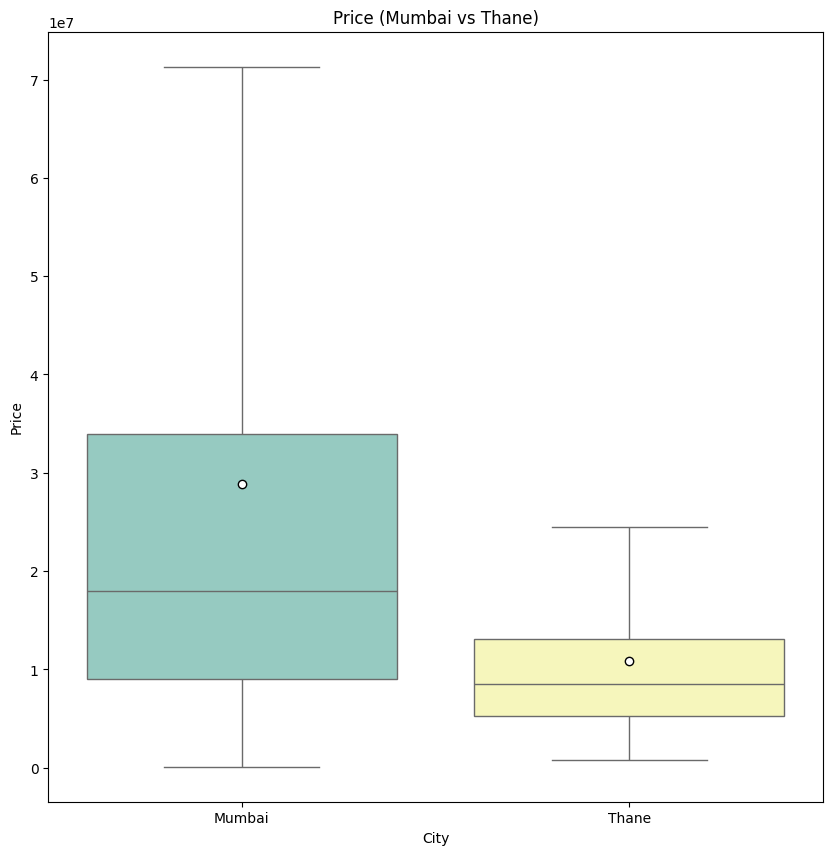

In [23]:
subset = df[(df['City'] == 'Thane') | (df['City'] == 'Mumbai')]

summary_table = get_full_data_summary(df=subset, group_by_columns=['City'], target_variable='Price')
print(tabulate(summary_table, headers='keys', tablefmt='pretty'))

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
Plotter.plot_box_plot(ax, df=subset, title='Price (Mumbai vs Thane)', target_field_1='City', target_field_2='Price')

plt.show()

# Task 4
```
Certain investors seek to compare investment opportunities in less expensive and more expensive
localities within each city. For instance, compare the average Carpet Area of high-budget properties
in prime locations (isPrimeLocationProperty) versus non-prime locations.
```

+--------------------+---------------------+
|   Location Type    | Average Carpet Area |
+--------------------+---------------------+
|   Prime Location   | 1250.4748445449407  |
| Non Prime Location |  1094.498432601881  |
+--------------------+---------------------+


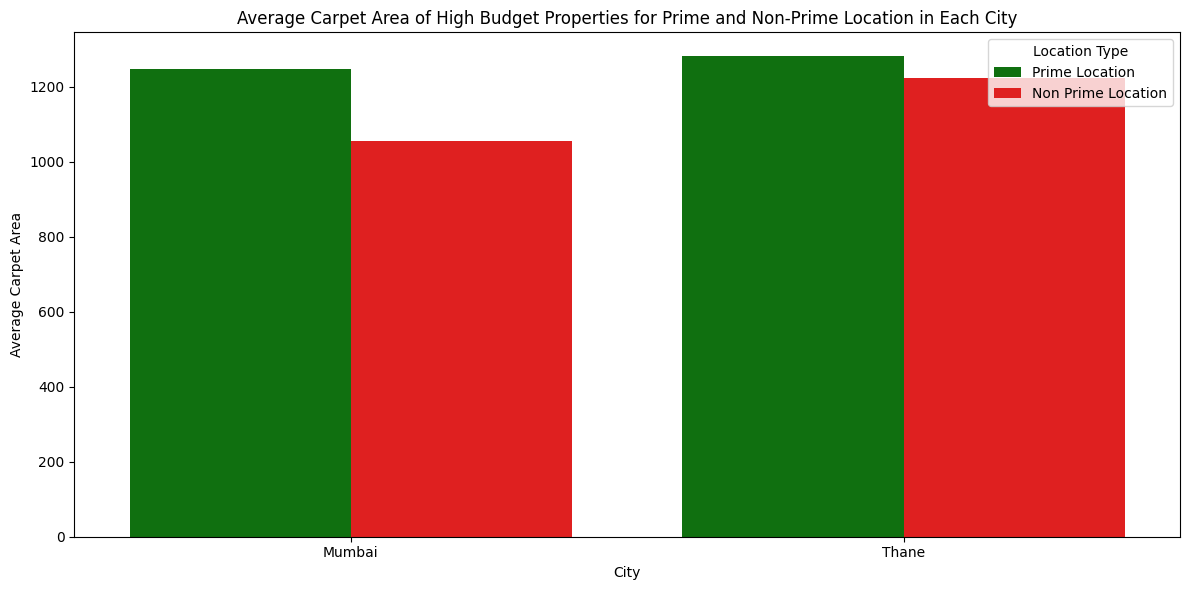

In [24]:
# filter by prime and non-prime location of high budget properties
budget_df = df[df['Price Category'] == 'high']
prime_location_df = budget_df[budget_df['isPrimeLocationProperty'] == 'Y']
non_prime_location_df = budget_df[budget_df['isPrimeLocationProperty'] == 'N']

prime_location_avg = prime_location_df['Carpet Area'].mean()
non_prime_location_avg = non_prime_location_df['Carpet Area'].mean()

# table to show average carpet area for prime and non-prime location using tabulate
table = [
    ['Prime Location', prime_location_avg],
    ['Non Prime Location', non_prime_location_avg]
]

print(tabulate(table, headers=['Location Type', 'Average Carpet Area'], tablefmt='pretty'))

# plot for average price comparison in each city
prime_location_carpet_area = prime_location_df.groupby('City')['Carpet Area'].mean()
non_prime_location_carpet_area = non_prime_location_df.groupby('City')['Carpet Area'].mean()
combined_df = pd.DataFrame({
            'Prime Location': prime_location_carpet_area,
            'Non Prime Location': non_prime_location_carpet_area
        }).reset_index()


fig, ax = plt.subplots(figsize=(12, 6))
Plotter.plot_comparison_bar(
    df=combined_df, 
    x_col='City', 
    y_cols={'Prime Location': 'Prime Location', 'Non Prime Location': 'Non Prime Location'}, 
    title='Average Carpet Area of High Budget Properties for Prime and Non-Prime Location in Each City', 
    x_label='City', 
    y_label='Average Carpet Area', 
    legend_title='Location Type', 
    ax=ax, 
    colors={'Prime Location': 'green', 'Non Prime Location': 'red'}
)
plt.show()

# Task 5
```
Some investors prefer larger area properties with relatively lower budgets. Identify and visualize properties that offer the best value in terms of Carpet Area per unit of Price across different cities.
```

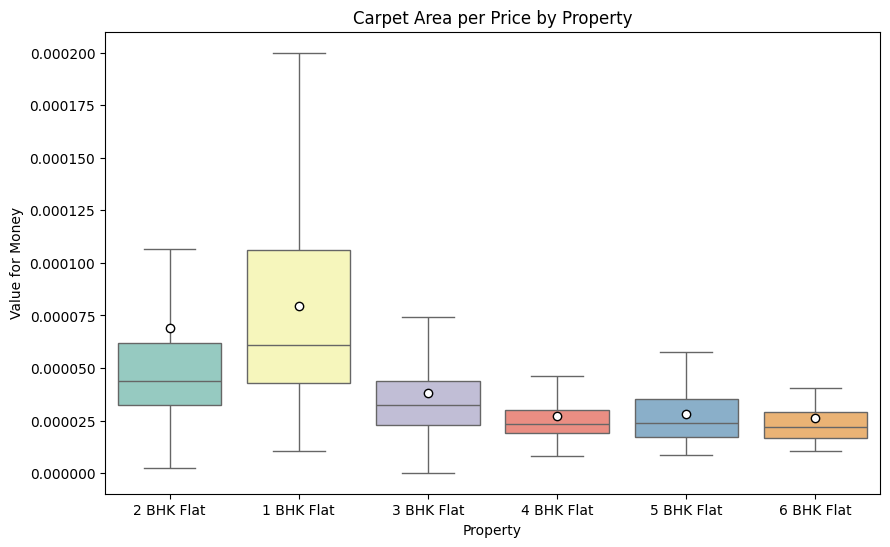

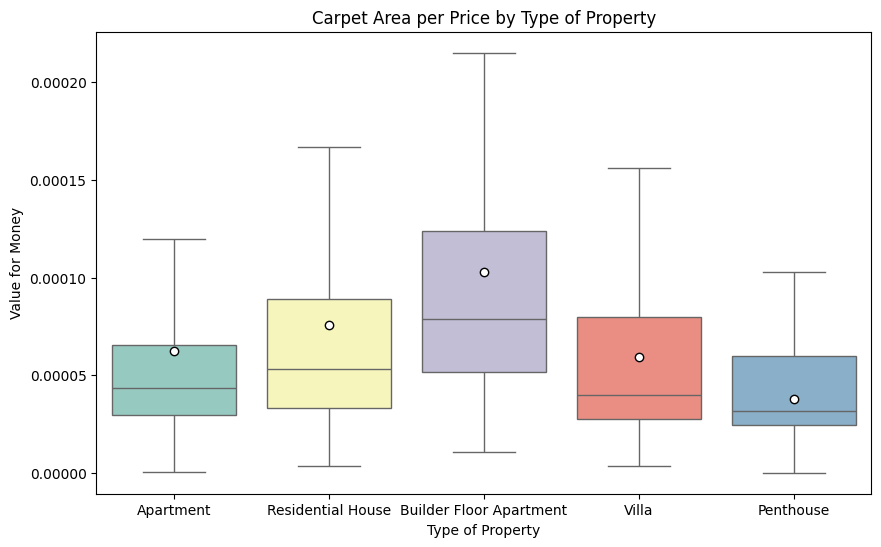

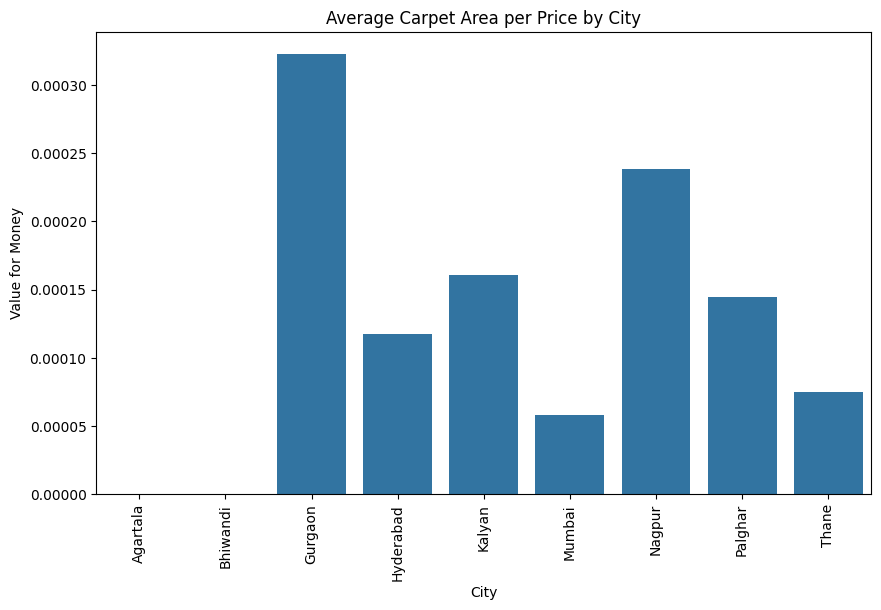

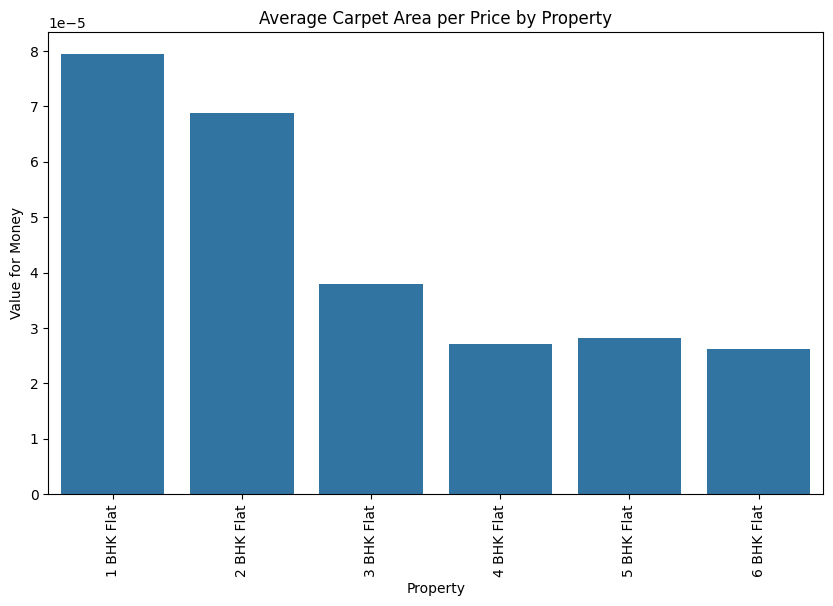

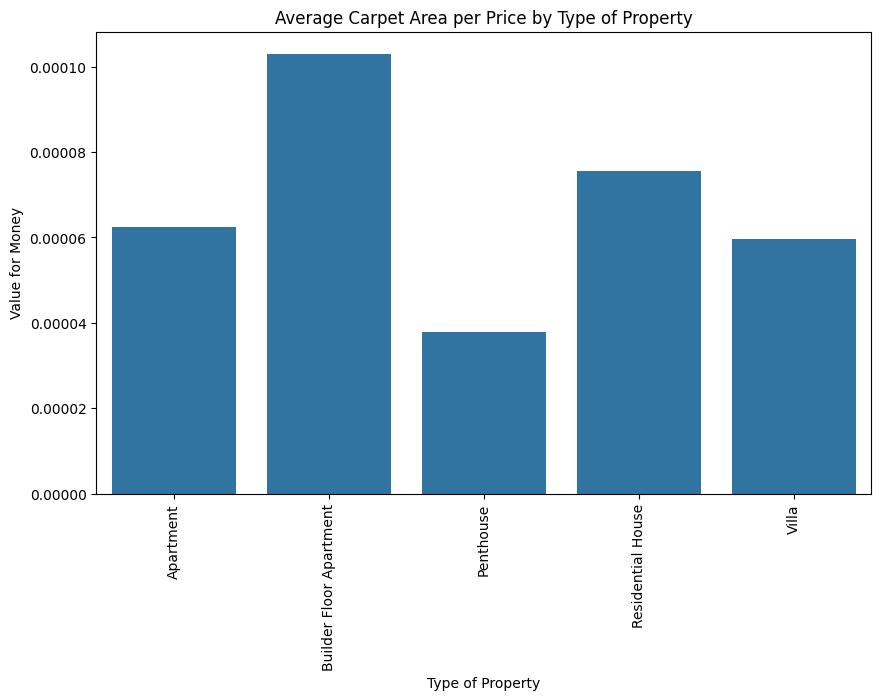

In [25]:
df['Value for Money'] = df['Carpet Area'] / df['Price']
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
Plotter.plot_box_plot(ax, df=df, title='Carpet Area per Price by Property', target_field_1='Property', target_field_2='Value for Money')
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
Plotter.plot_box_plot(ax, df=df, title='Carpet Area per Price by Type of Property', target_field_1='Type of Property', target_field_2='Value for Money')
plt.show()

# Bar Plot: Average Carpet Area per Price by City
avg_value_city = df.groupby('City')['Value for Money'].mean().reset_index()
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
Plotter.plot_bar_plot(ax, avg_value_city, title='Average Carpet Area per Price by City', x='City', y='Value for Money')
plt.show()

# Bar Plot: Average Carpet Area per Price by Property 
avg_value_property = df.groupby('Property')['Value for Money'].mean().reset_index()
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
Plotter.plot_bar_plot(ax, avg_value_property, title='Average Carpet Area per Price by Property', x='Property', y='Value for Money')
plt.show()

# Bar Plot: Average Carpet Area per Price by Type of Property
avg_value_property = df.groupby('Type of Property')['Value for Money'].mean().reset_index()
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
Plotter.plot_bar_plot(ax, avg_value_property, title='Average Carpet Area per Price by Type of Property', x='Type of Property', y='Value for Money')
plt.show()

# Task 6
```
Some investors are interested in knowing the hotspots for their offices in Mumbai and Thane. Analyze commercial properties in these cities, considering factors like Price, Carpet Area, Amenities, and Location.
```

In [26]:
commercial_mumbai_df = df[(df['Commercial'] == 'Y') & (df['City'] == 'Mumbai')]
non_commercial_mumbai_df = df[(df['Commercial'] == 'N') & (df['City'] == 'Mumbai')]
commercial_thane_df = df[(df['Commercial'] == 'Y') & (df['City'] == 'Thane')]
non_commercial_thane_df = df[(df['Commercial'] == 'N') & (df['City'] == 'Thane')]

commercial_mumbai_df['Location & Commercial Type'] = 'Commercial - Mumbai'
non_commercial_mumbai_df['Location & Commercial Type'] = 'Non Commercial - Mumbai'
commercial_thane_df['Location & Commercial Type'] = 'Commercial - Thane'
non_commercial_thane_df['Location & Commercial Type'] = 'Non Commercial - Thane'

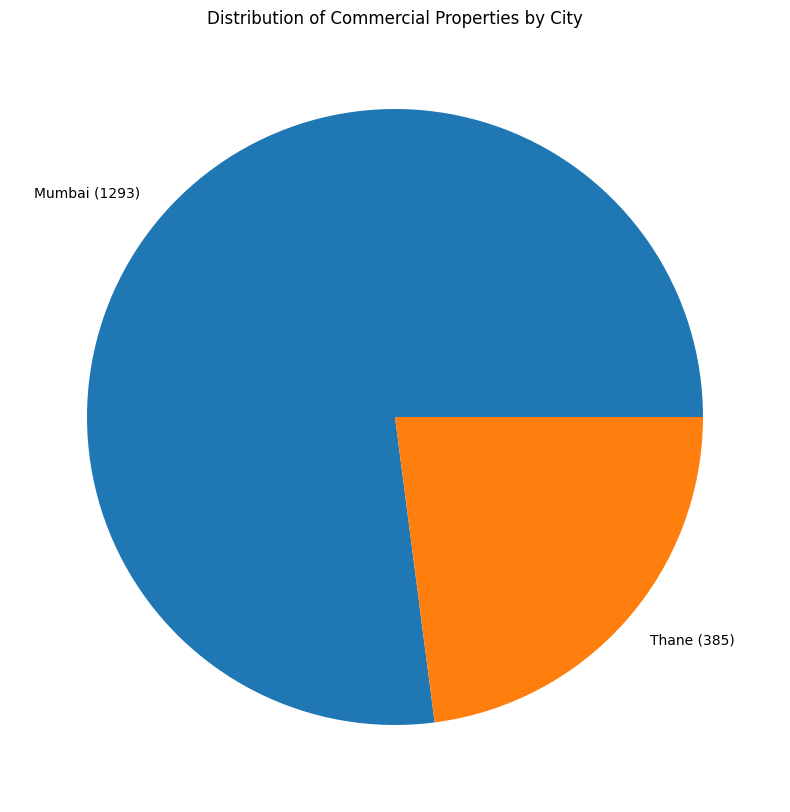

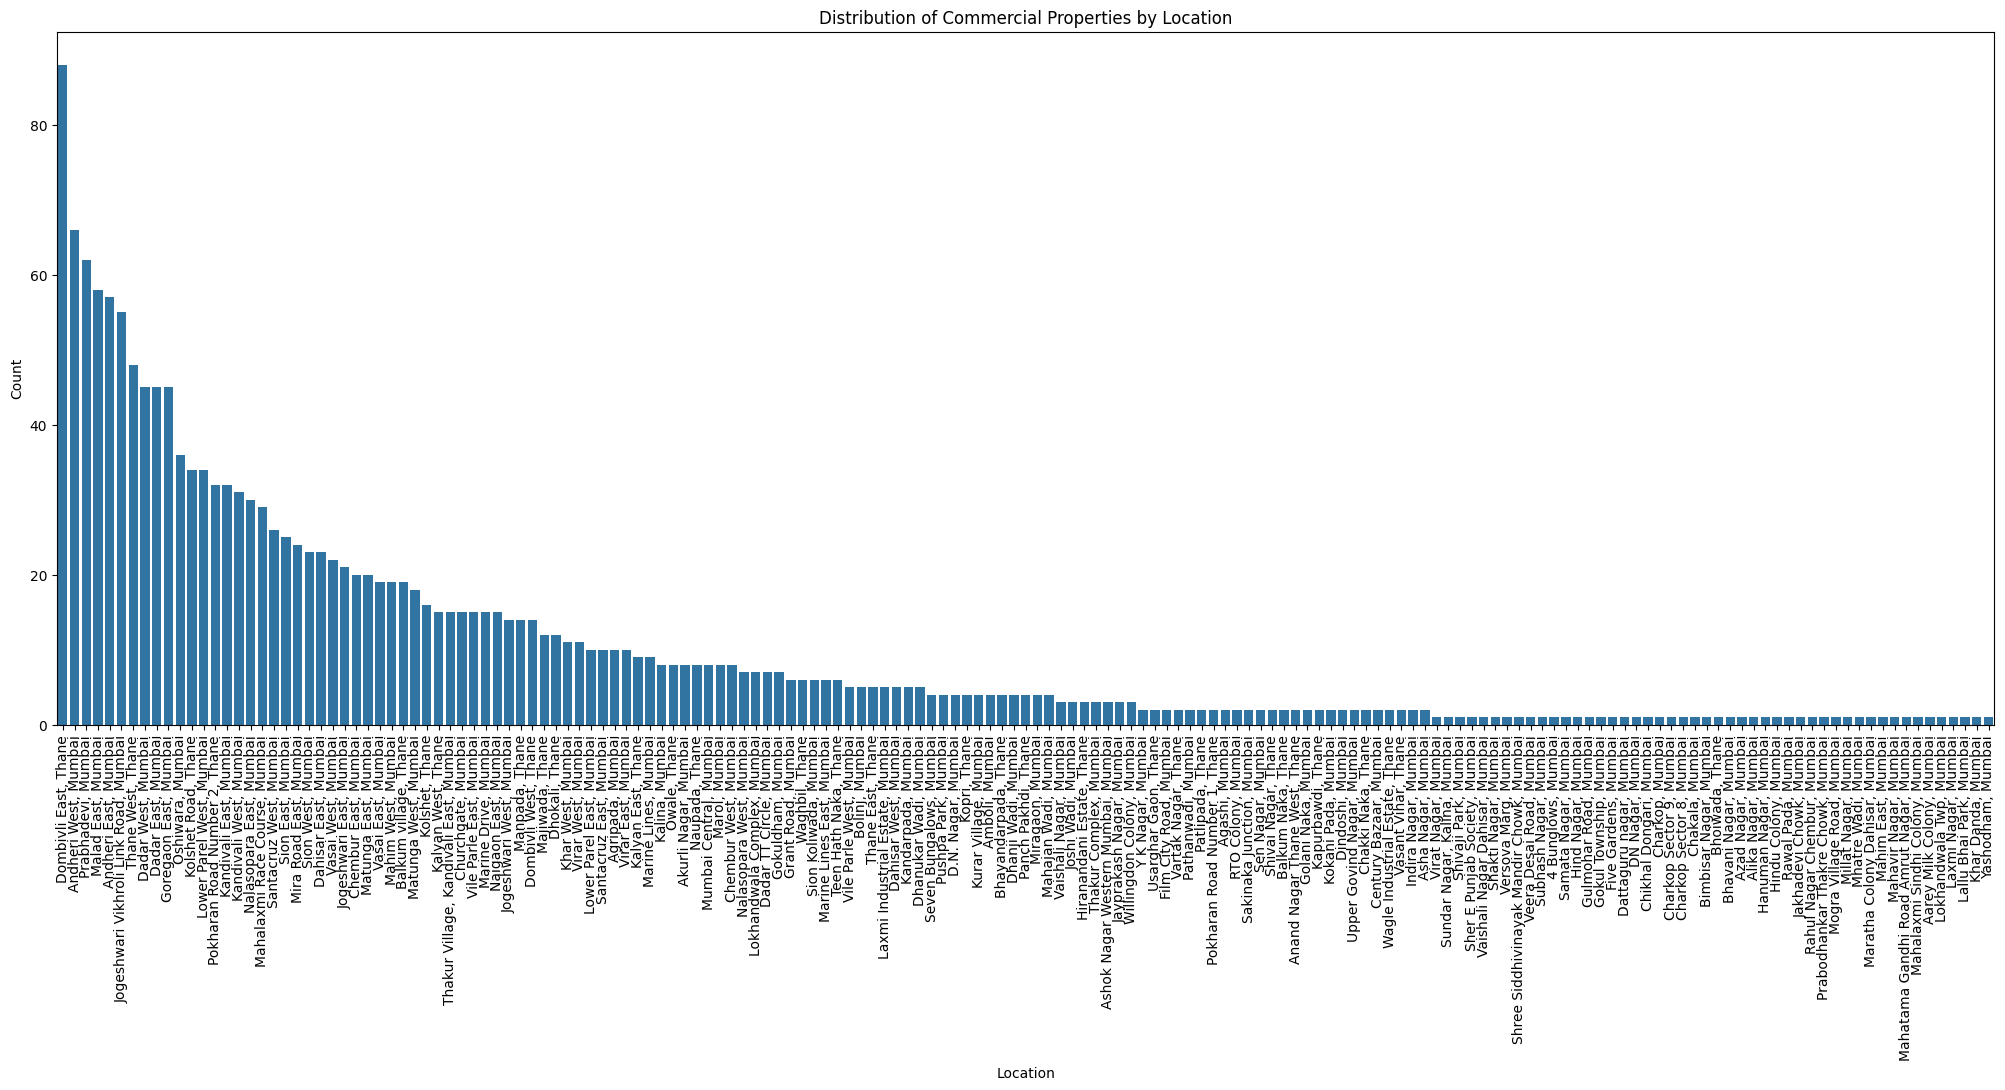

In [27]:
commercial_df = df[df['Commercial'] == 'Y']
commercial_df = commercial_df[(commercial_df['City'] == 'Mumbai') | (commercial_df['City'] == 'Thane')]
location_count_df = commercial_df.groupby('City').size().reset_index(name='Count')
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
Plotter.plot_pie_chart(ax, location_count_df, title='Distribution of Commercial Properties by City', target_field='City')
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(25,9))
location_count_df = commercial_df.groupby('Location').size().reset_index(name='Count')
location_count_df = location_count_df.sort_values('Count', ascending=False)
Plotter.plot_bar_plot(ax, df=location_count_df, title='Distribution of Commercial Properties by Location', x='Location', y='Count')
plt.show()

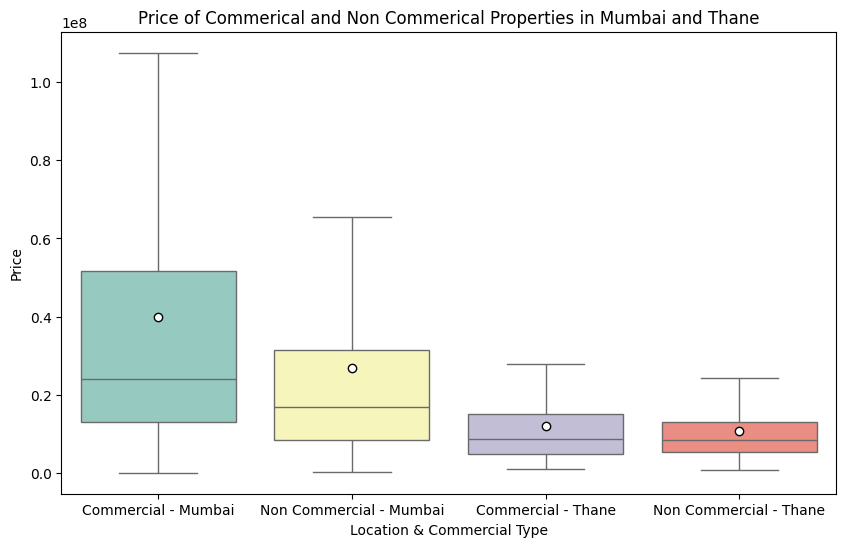

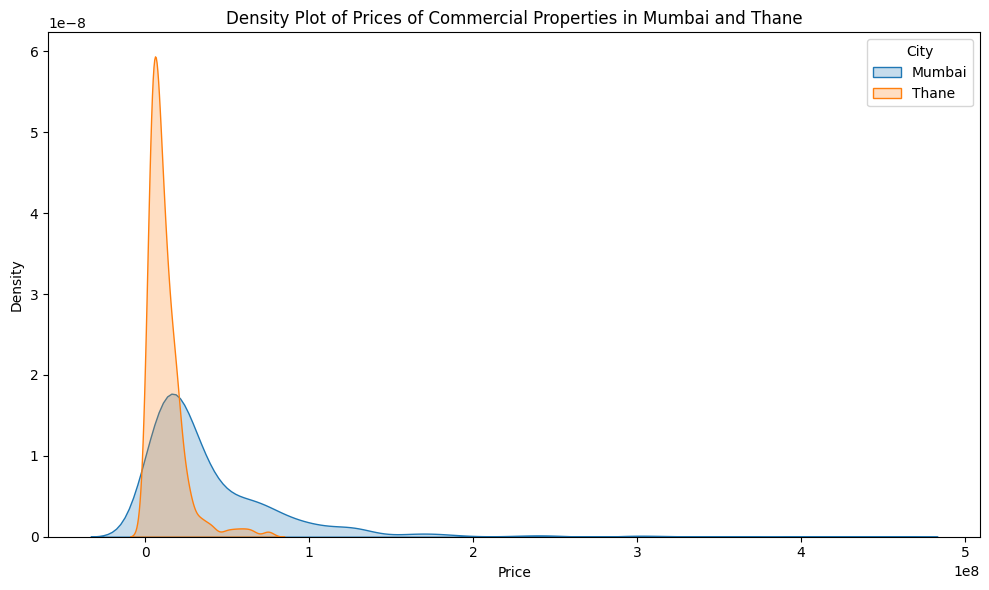

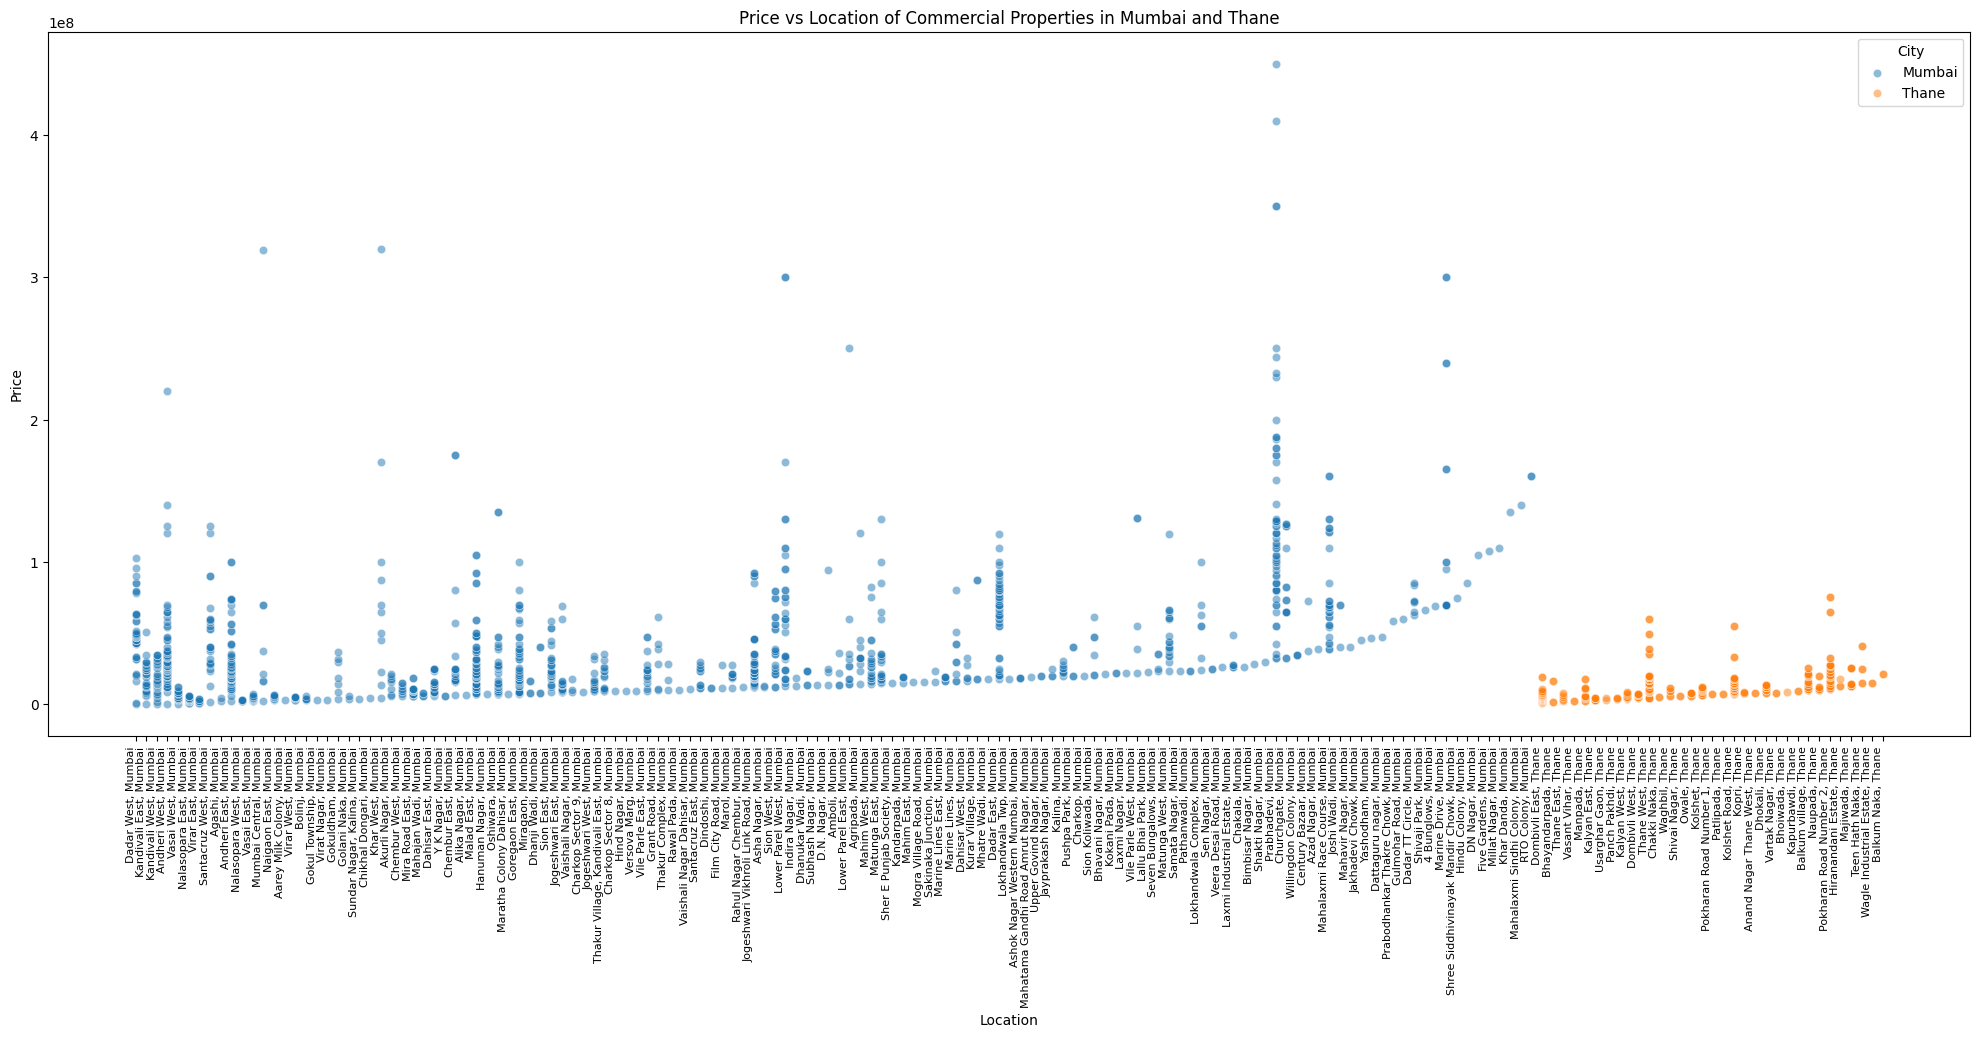

In [28]:
combined_df = pd.concat([commercial_mumbai_df, non_commercial_mumbai_df, commercial_thane_df, non_commercial_thane_df])
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
Plotter.plot_box_plot(ax, df=combined_df, title='Price of Commerical and Non Commerical Properties in Mumbai and Thane', target_field_1='Location & Commercial Type', target_field_2='Price')
plt.show()

cities = ['Mumbai', 'Thane']
city_data = {}
for city in cities:
    city_data[city] = commercial_df[commercial_df['City'] == city]

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
for city,city_df in city_data.items():
    Plotter.plot_kde_plot(ax, city_df, title='Density Plot of Prices of Commercial Properties in Mumbai and Thane', target_field='Price',legend_title='City',label_name=city)
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(20, 8))
for city, city_df in city_data.items():
    Plotter.plot_scatter_plot(ax, city_df, title='Price vs Location of Commercial Properties in Mumbai and Thane', target_field_1='Location', target_field_2='Price',legend_title='City',label_name=city)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right', fontsize=8)
plt.show()

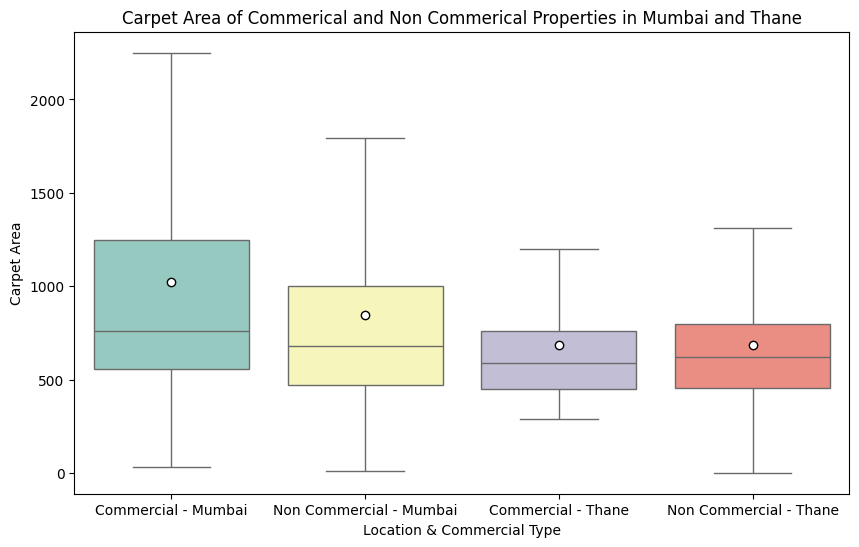

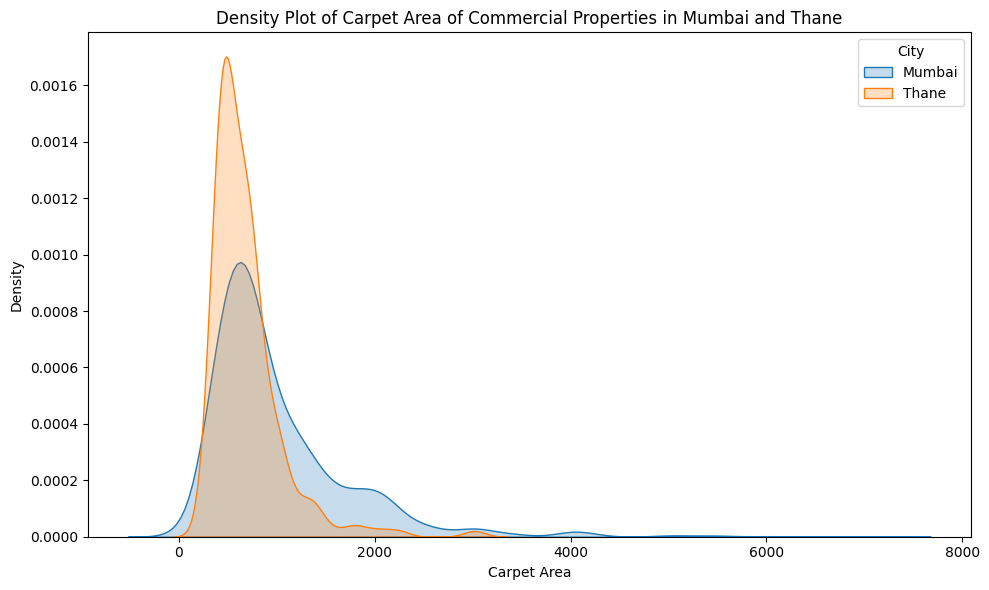

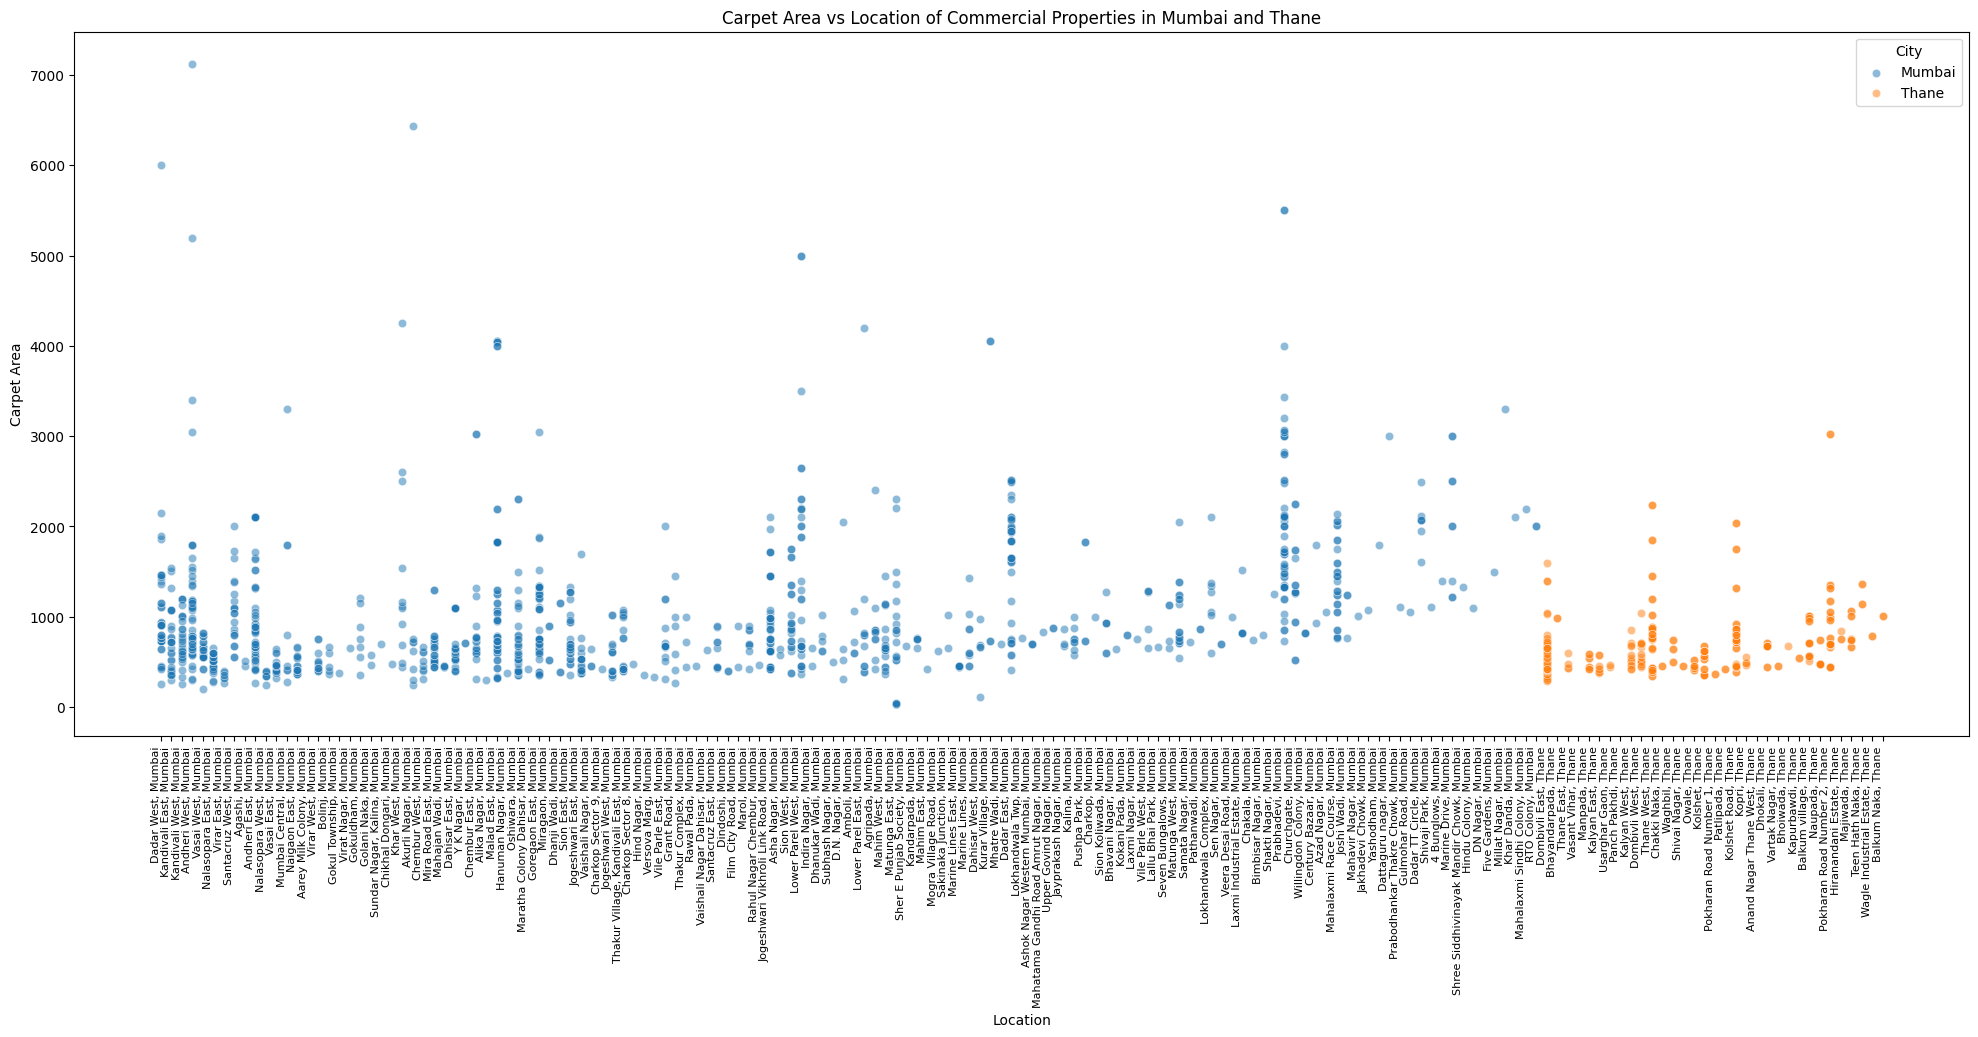

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
Plotter.plot_box_plot(ax, df=combined_df, title='Carpet Area of Commerical and Non Commerical Properties in Mumbai and Thane', target_field_1='Location & Commercial Type', target_field_2='Carpet Area')
plt.show()

fig,ax = plt.subplots(1, 1, figsize=(10, 6))
for city,city_df in city_data.items():
    Plotter.plot_kde_plot(ax, city_df, title='Density Plot of Carpet Area of Commercial Properties in Mumbai and Thane', target_field='Carpet Area',legend_title='City',label_name=city)
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(20, 8))
for city, city_df in city_data.items():
    Plotter.plot_scatter_plot(ax, city_df, title='Carpet Area vs Location of Commercial Properties in Mumbai and Thane', target_field_1='Location', target_field_2='Carpet Area',label_name=city,legend_title='City')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right', fontsize=8)
plt.show()

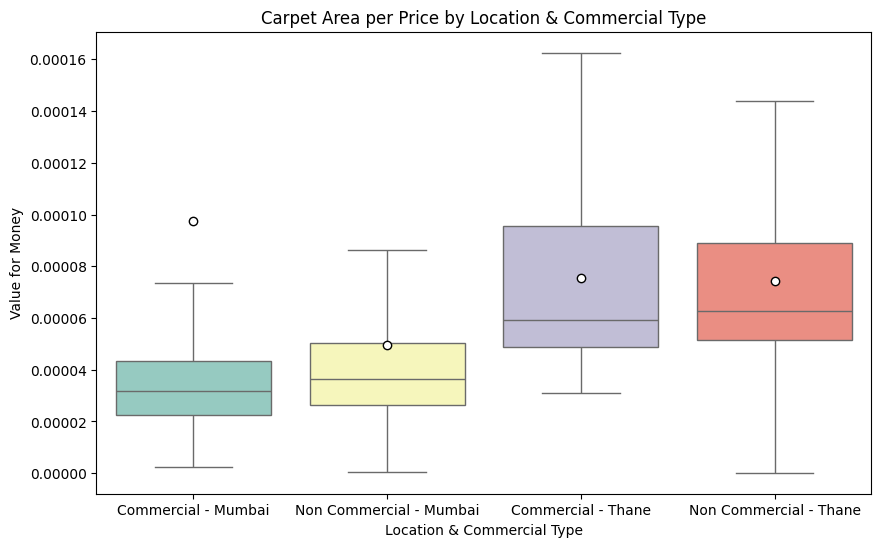

In [31]:
combined_df['Value for Money'] = combined_df['Carpet Area'] / combined_df['Price']
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
Plotter.plot_box_plot(ax, df=combined_df, title='Carpet Area per Price by Location & Commercial Type', target_field_1='Location & Commercial Type', target_field_2='Value for Money')
plt.show()

<Figure size 2000x800 with 0 Axes>

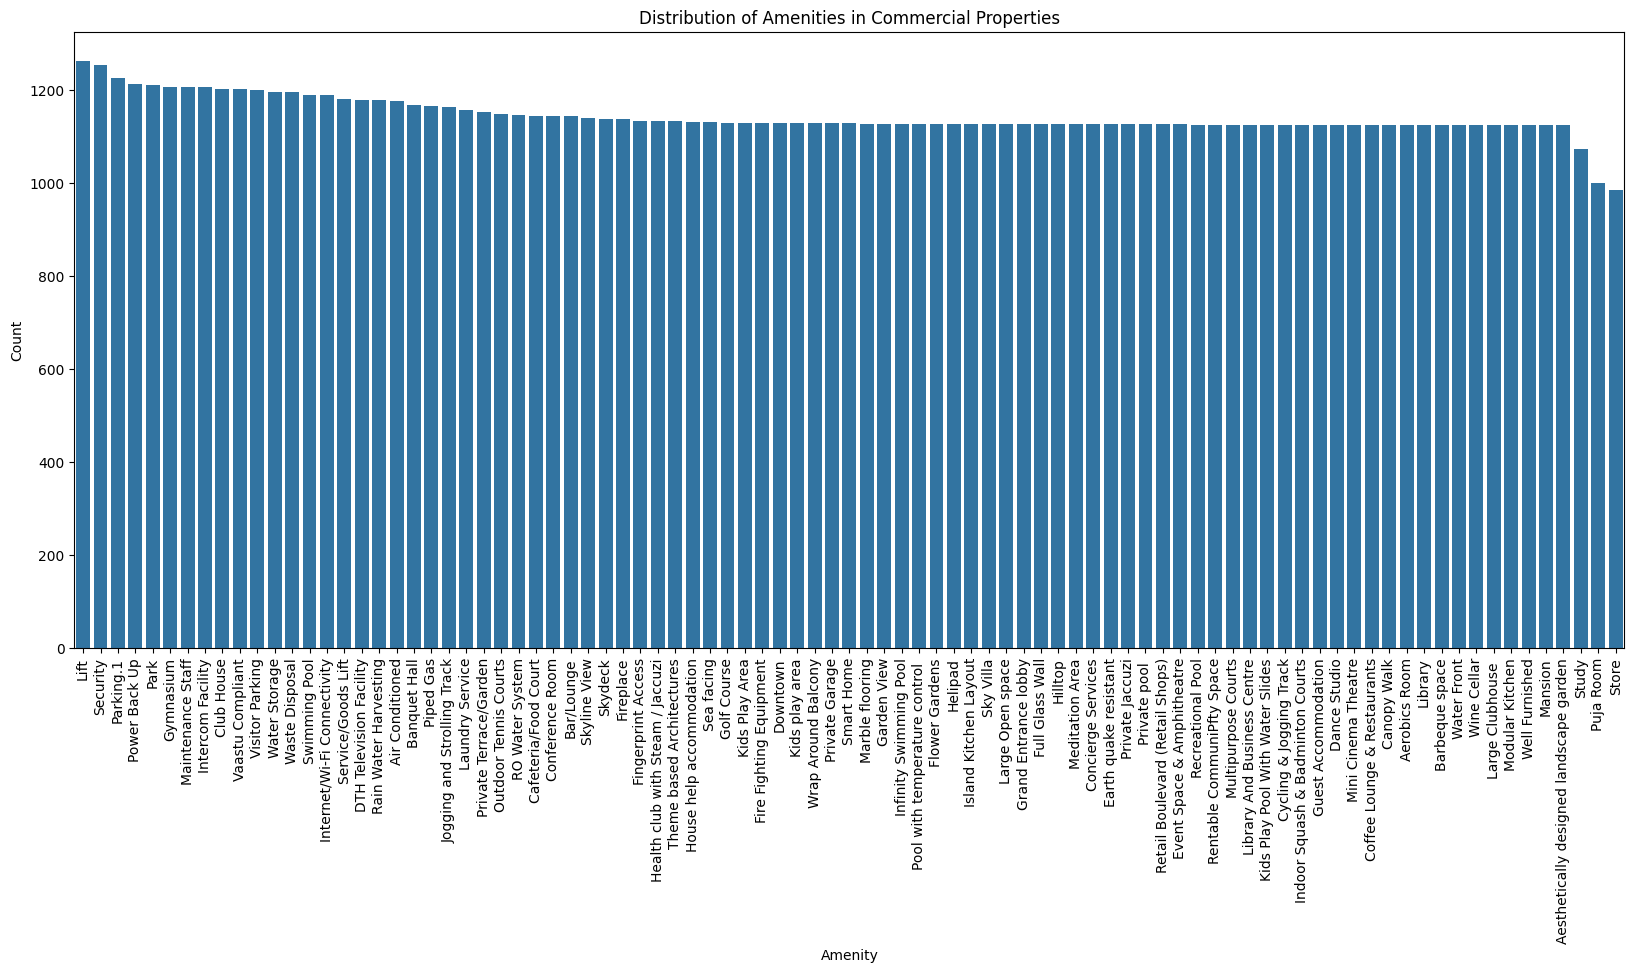

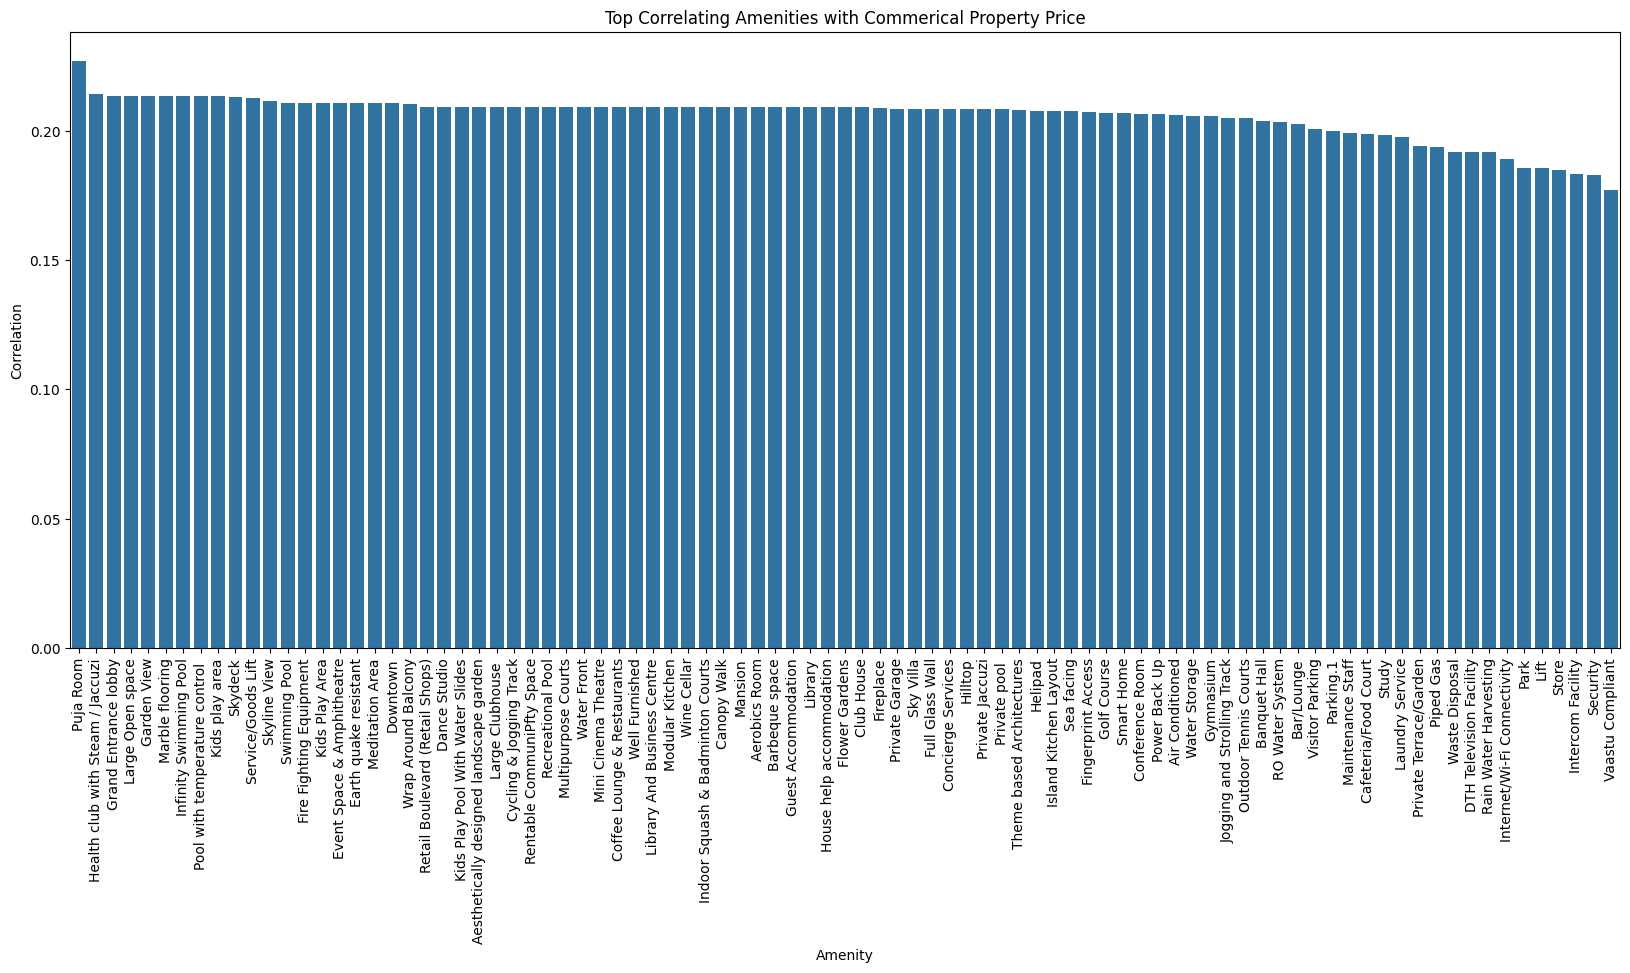

In [32]:
amenities_list = [
  'Power Back Up',
  'Lift',
  'Rain Water Harvesting',
  'Club House',
  'Swimming Pool',
  'Gymnasium',
  'Park',
  'Parking.1',
  'Security',
  'Water Storage',
  'Private Terrace/Garden',
  'Vaastu Compliant',
  'Service/Goods Lift',
  'Air Conditioned',
  'Visitor Parking',
  'Intercom Facility',
  'Maintenance Staff',
  'Waste Disposal',
  'Laundry Service',
  'Internet/Wi-Fi Connectivity',
  'DTH Television Facility',
  'RO Water System',
  'Banquet Hall',
  'Bar/Lounge',
  'Cafeteria/Food Court',
  'Conference Room',
  'Piped Gas',
  'Jogging and Strolling Track',
  'Outdoor Tennis Courts',
  'Mansion',
  'Downtown',
  'Skyline View',
  'Wrap Around Balcony',
  'Island Kitchen Layout',
  'Full Glass Wall',
  'House help accommodation',
  'Concierge Services',
  'Garden View',
  'Marble flooring',
  'Well Furnished',
  'Modular Kitchen',
  'Helipad',
  'Private pool ',
  'Private Jaccuzi',
  'Mini Cinema Theatre',
  'Golf Course',
  'Infinity Swimming Pool',
  'Pool with temperature control ',
  'Sea facing',
  'Skydeck',
  'Earth quake resistant',
  'Theme based Architectures',
  'Health club with Steam / Jaccuzi',
  'Large Clubhouse ',
  'Large Open space',
  'Fingerprint Access',
  'Grand Entrance lobby',
  'Private Garage',
  'Fireplace',
  'Wine Cellar',
  'Sky Villa',
  'Water Front',
  'Hilltop',
  'Smart Home',
  'Barbeque space',
  'Kids play area',
  'Library',
  'Puja Room',
  'Study',
  'Store',
  'Aerobics Room',
  'Canopy Walk',
  'Coffee Lounge & Restaurants',
  'Dance Studio',
  'Event Space & Amphitheatre',
  'Flower Gardens',
  'Guest Accommodation',
  'Indoor Squash & Badminton Courts',
  'Kids Play Area',
  'Kids Play Pool With Water Slides',
  'Library And Business Centre',
  'Meditation Area',
  'Multipurpose Courts',
  'Recreational Pool',
  'Rentable CommuniPfty Space',
  'Retail Boulevard (Retail Shops)',
  'Cycling & Jogging Track',
  'Fire Fighting Equipment',
  'Aesthetically designed landscape garden'
]

cities = [
  'Mumbai',
  'Thane',
]

amenity_count = commercial_df[amenities_list].sum()
plt.figure(figsize=(20, 8))
amenity_count = amenity_count.sort_values(ascending=False)
amenity_count_df = pd.DataFrame({
    'Amenity': amenity_count.index,
    'Count': amenity_count.values
})
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
Plotter.plot_bar_plot(ax, amenity_count_df, title='Distribution of Amenities in Commercial Properties', x='Amenity', y='Count')
plt.show()

commercial_df = df[(df['Commercial'] == 'Y') & (df['City'].isin(cities))]
amenities_df = pd.get_dummies(commercial_df[amenities_list])
amenities_df['Price'] = commercial_df['Price'].values
correlation_matrix = amenities_df.corr()
top_positive_corr = correlation_matrix['Price'].sort_values(ascending=False)
top_amenities_corr = pd.concat([top_positive_corr[1:]])
top_amenities_corr_df = pd.DataFrame({
    'Amenity': top_amenities_corr.index,
    'Correlation': top_amenities_corr.values
})
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
Plotter.plot_bar_plot(ax, top_amenities_corr_df, title='Top Correlating Amenities with Commerical Property Price', x='Amenity', y='Correlation')
plt.show()

# Task 7

`Some investors want to analyze the impact of various amenities (e.g., Swimming Pool, Gymnasium,
Club House) on property prices in Mumbai and Thane. Which amenities seem to add the most value?
Are there differences in amenity preferences between the two cities?`

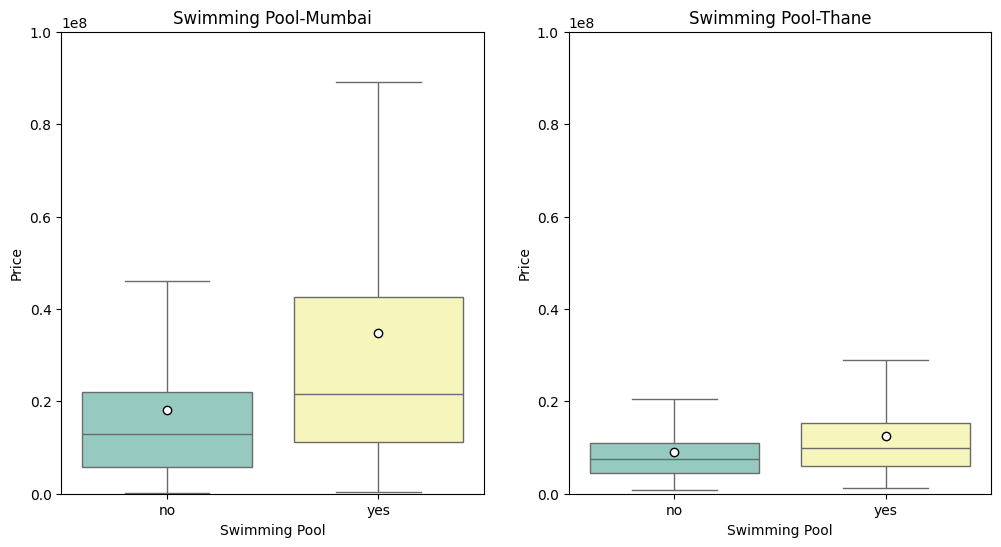

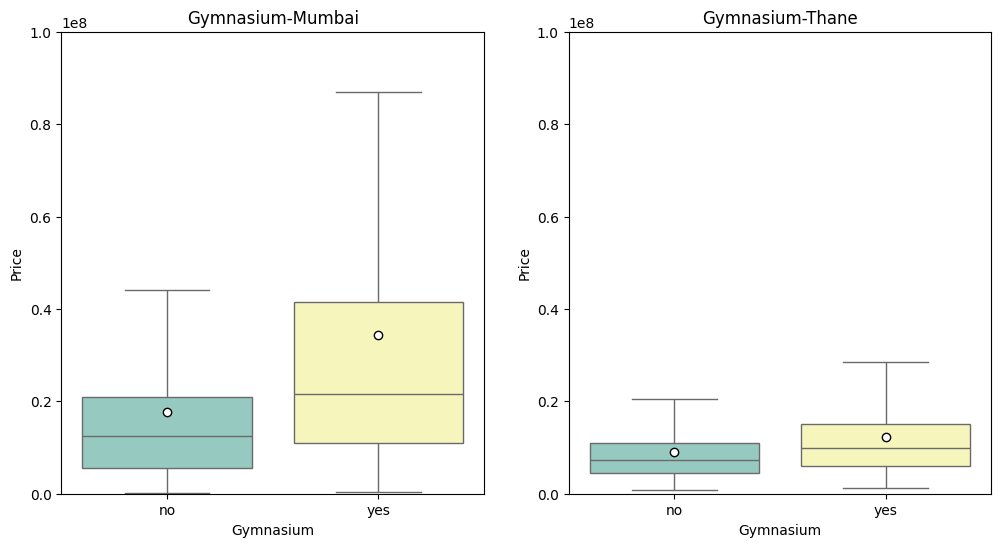

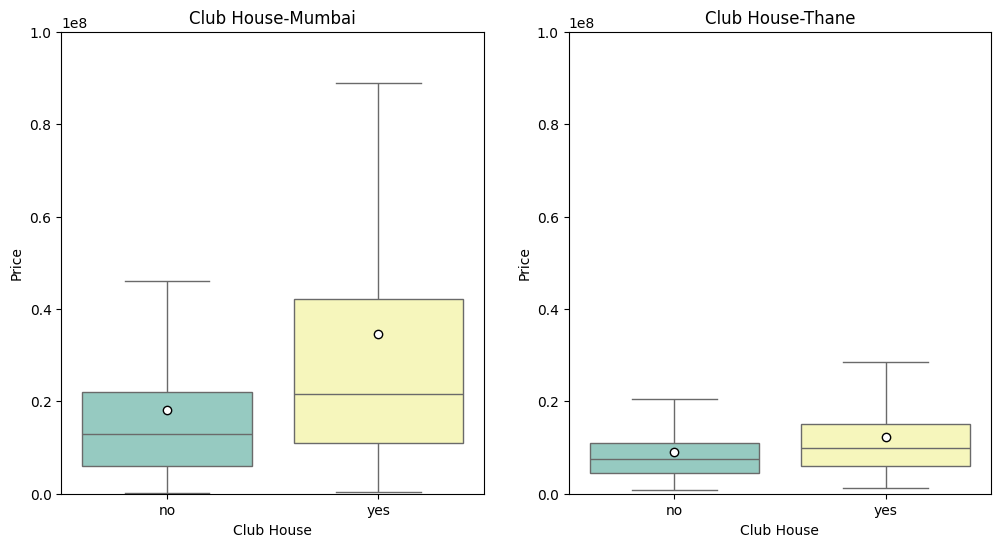

In [33]:
amenities_list = [
  'Swimming Pool',
  'Gymnasium',
  'Club House',
]
cities = [
  'Mumbai',
  'Thane',
]

for amenity in amenities_list:
  fig, axes = plt.subplots(1, 2, figsize=(12, 6))
  axes = axes.flatten()

  for (ax, city) in zip(axes, cities):
    subset = df[(df['City'] == city)]
    subset[amenity] = subset[amenity].map({0: 'no', 1: 'yes'})
    Plotter.plot_box_plot(ax, df=subset, title=f'{amenity}-{city}', target_field_1=amenity, target_field_2='Price')
    ax.set_ylim(0, 10*1e7)

  plt.show()

Mumbai :
+----+-----------------------------------------+--------------------+-----------------------+--------------------+
|    |                 Amenity                 | Price With Amenity | Price Without Amenity |  Price Difference  |
+----+-----------------------------------------+--------------------+-----------------------+--------------------+
| 7  |                Parking.1                | 33615707.107412264 |  16626687.838413361   | 16989019.268998902 |
| 13 |             Air Conditioned             |  34546130.0372151  |   17656737.23496698   | 16889392.80224812  |
| 4  |              Swimming Pool              |  34809660.8361106  |  18045495.213720318   | 16764165.622390281 |
| 52 |    Health club with Steam / Jaccuzi     | 35458222.75371966  |   18815036.18552437   | 16643186.568195287 |
| 12 |           Service/Goods Lift            | 34624926.97071054  |  17994270.168467253   | 16630656.802243285 |
| 49 |                 Skydeck                 | 35482952.33981536  |  

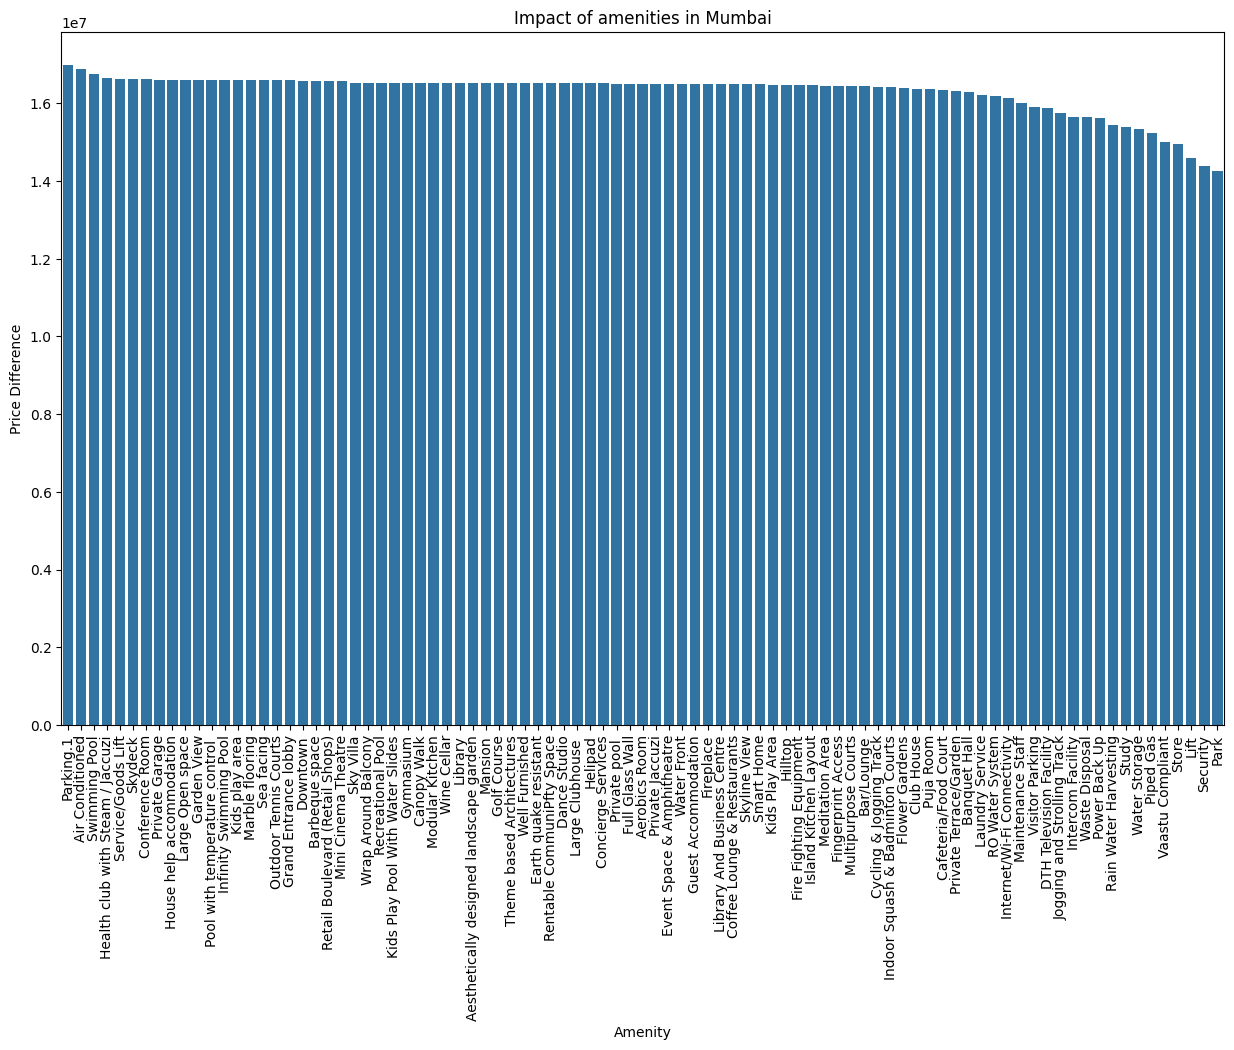

Thane :
+----+-----------------------------------------+--------------------+-----------------------+--------------------+
|    |                 Amenity                 | Price With Amenity | Price Without Amenity |  Price Difference  |
+----+-----------------------------------------+--------------------+-----------------------+--------------------+
| 31 |              Skyline View               | 13012178.387650086 |   9189505.318435755   | 3822673.069214331  |
| 22 |              Banquet Hall               | 12690315.425332677 |   8985651.625793844   | 3704663.799538832  |
| 24 |          Cafeteria/Food Court           | 12780387.028242677 |   9106367.318853974   | 3674019.709388703  |
| 23 |               Bar/Lounge                | 12834747.145187601 |   9181573.033527045   | 3653174.111660557  |
| 18 |             Laundry Service             | 12672605.249133235 |   9021044.666018473   | 3651560.583114762  |
| 25 |             Conference Room             | 12726019.616933402 |   

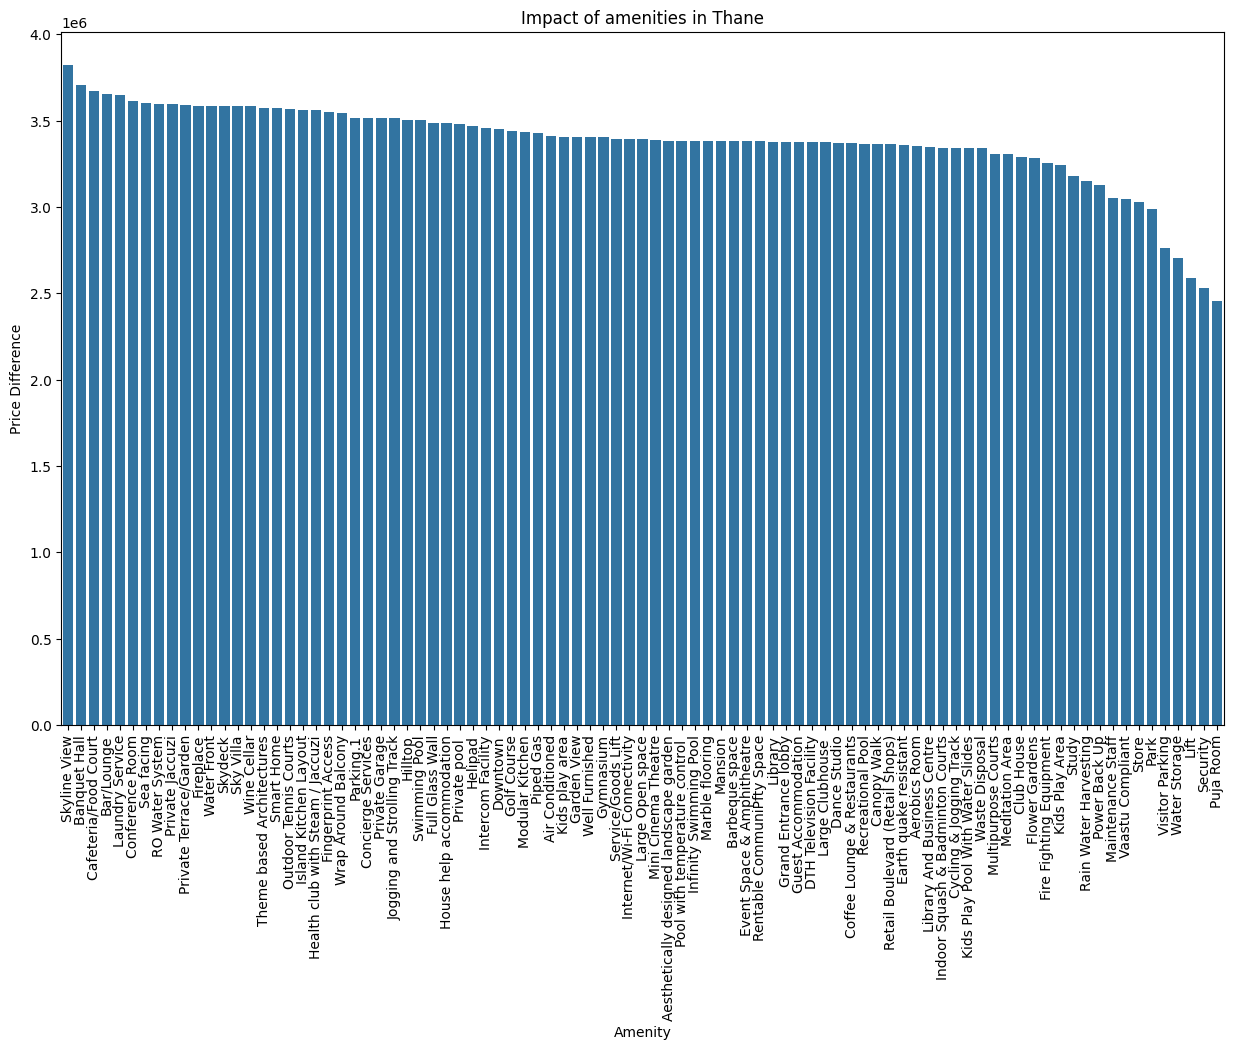

In [34]:
amenities_list = [
  'Power Back Up',
  'Lift',
  'Rain Water Harvesting',
  'Club House',
  'Swimming Pool',
  'Gymnasium',
  'Park',
  'Parking.1',
  'Security',
  'Water Storage',
  'Private Terrace/Garden',
  'Vaastu Compliant',
  'Service/Goods Lift',
  'Air Conditioned',
  'Visitor Parking',
  'Intercom Facility',
  'Maintenance Staff',
  'Waste Disposal',
  'Laundry Service',
  'Internet/Wi-Fi Connectivity',
  'DTH Television Facility',
  'RO Water System',
  'Banquet Hall',
  'Bar/Lounge',
  'Cafeteria/Food Court',
  'Conference Room',
  'Piped Gas',
  'Jogging and Strolling Track',
  'Outdoor Tennis Courts',
  'Mansion',
  'Downtown',
  'Skyline View',
  'Wrap Around Balcony',
  'Island Kitchen Layout',
  'Full Glass Wall',
  'House help accommodation',
  'Concierge Services',
  'Garden View',
  'Marble flooring',
  'Well Furnished',
  'Modular Kitchen',
  'Helipad',
  'Private pool ',
  'Private Jaccuzi',
  'Mini Cinema Theatre',
  'Golf Course',
  'Infinity Swimming Pool',
  'Pool with temperature control ',
  'Sea facing',
  'Skydeck',
  'Earth quake resistant',
  'Theme based Architectures',
  'Health club with Steam / Jaccuzi',
  'Large Clubhouse ',
  'Large Open space',
  'Fingerprint Access',
  'Grand Entrance lobby',
  'Private Garage',
  'Fireplace',
  'Wine Cellar',
  'Sky Villa',
  'Water Front',
  'Hilltop',
  'Smart Home',
  'Barbeque space',
  'Kids play area',
  'Library',
  'Puja Room',
  'Study',
  'Store',
  'Aerobics Room',
  'Canopy Walk',
  'Coffee Lounge & Restaurants',
  'Dance Studio',
  'Event Space & Amphitheatre',
  'Flower Gardens',
  'Guest Accommodation',
  'Indoor Squash & Badminton Courts',
  'Kids Play Area',
  'Kids Play Pool With Water Slides',
  'Library And Business Centre',
  'Meditation Area',
  'Multipurpose Courts',
  'Recreational Pool',
  'Rentable CommuniPfty Space',
  'Retail Boulevard (Retail Shops)',
  'Cycling & Jogging Track',
  'Fire Fighting Equipment',
  'Aesthetically designed landscape garden'
]

cities = [
  'Mumbai',
  'Thane',
]

for city in cities:
  subset = df[(df['City'] == city)]

  temp_df = []
  for amenity in amenities_list:
    mean_with_amenity = subset[subset[amenity] == 1]['Price'].mean()
    mean_without_amenity = subset[subset[amenity] == 0]['Price'].mean()
    temp_df.append([amenity, mean_with_amenity, mean_without_amenity])
  
  temp_df = pd.DataFrame(temp_df, columns=['Amenity', 'Price With Amenity', 'Price Without Amenity'])
  temp_df['Price Difference'] = temp_df['Price With Amenity'] - temp_df['Price Without Amenity']  
  temp_df = temp_df.sort_values(by='Price Difference', ascending=False)

  print(city, ':')
  print(tabulate(temp_df, headers='keys', tablefmt='pretty'))

  fig, ax = plt.subplots(figsize=(15, 9))
  Plotter.plot_bar_plot(ax=ax, df=temp_df, title=f'Impact of amenities in {city}', x='Amenity', y='Price Difference')
  plt.show()

# Task 8

`Investors want investigate how the Possession Status and ”Availability Starts From” dates affect prop-
erty prices. Are there significant price differences between ready-to-move-in properties and under-
construction ones? How does this vary between Mumbai and Thane?`

+---+--------------------+--------------------+----------------+-------+
|   | Possession Status  |    Price (Mean)    | Price (Median) | Count |
+---+--------------------+--------------------+----------------+-------+
| 0 |   Ready to Move    | 22772973.062744696 |   13000000.0   | 9706  |
| 1 | Under Construction | 23527434.719322503 |   14000000.0   | 2893  |
+---+--------------------+--------------------+----------------+-------+


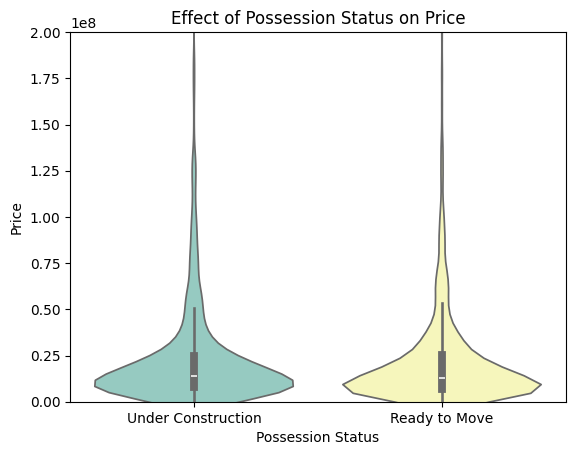

In [37]:
summary_table = get_full_data_summary(df, group_by_columns=['Possession Status'], target_variable='Price')
print(tabulate(summary_table, headers='keys', tablefmt='pretty'))

fig, ax = plt.subplots()
Plotter.plot_violin_plot(ax=ax, df=df, title='Effect of Possession Status on Price', target_field_1='Possession Status', target_field_2='Price')
ax.set_ylim(0, 2*1e8)
plt.show()

+-----+----------------------------+--------------------------+--------------------+----------------+-------+
|     | Availability Starts (Date) | Availability Starts From |    Price (Mean)    | Price (Median) | Count |
+-----+----------------------------+--------------------------+--------------------+----------------+-------+
|  0  |    2012-10-01 00:00:00     |         Oct '12          |     11000000.0     |   11000000.0   |   2   |
|  1  |    2014-11-01 00:00:00     |         Nov '14          |     4000000.0      |   4000000.0    |   1   |
|  2  |    2014-12-01 00:00:00     |         Dec '14          |     8500000.0      |   8500000.0    |   1   |
|  3  |    2015-04-01 00:00:00     |         Apr '15          |     6000000.0      |   6000000.0    |   1   |
|  4  |    2015-12-01 00:00:00     |         Dec '15          |     2950000.0      |   2950000.0    |   1   |
|  5  |    2016-06-01 00:00:00     |         Jun '16          |     7695000.0      |   7695000.0    |   2   |
|  6  |   

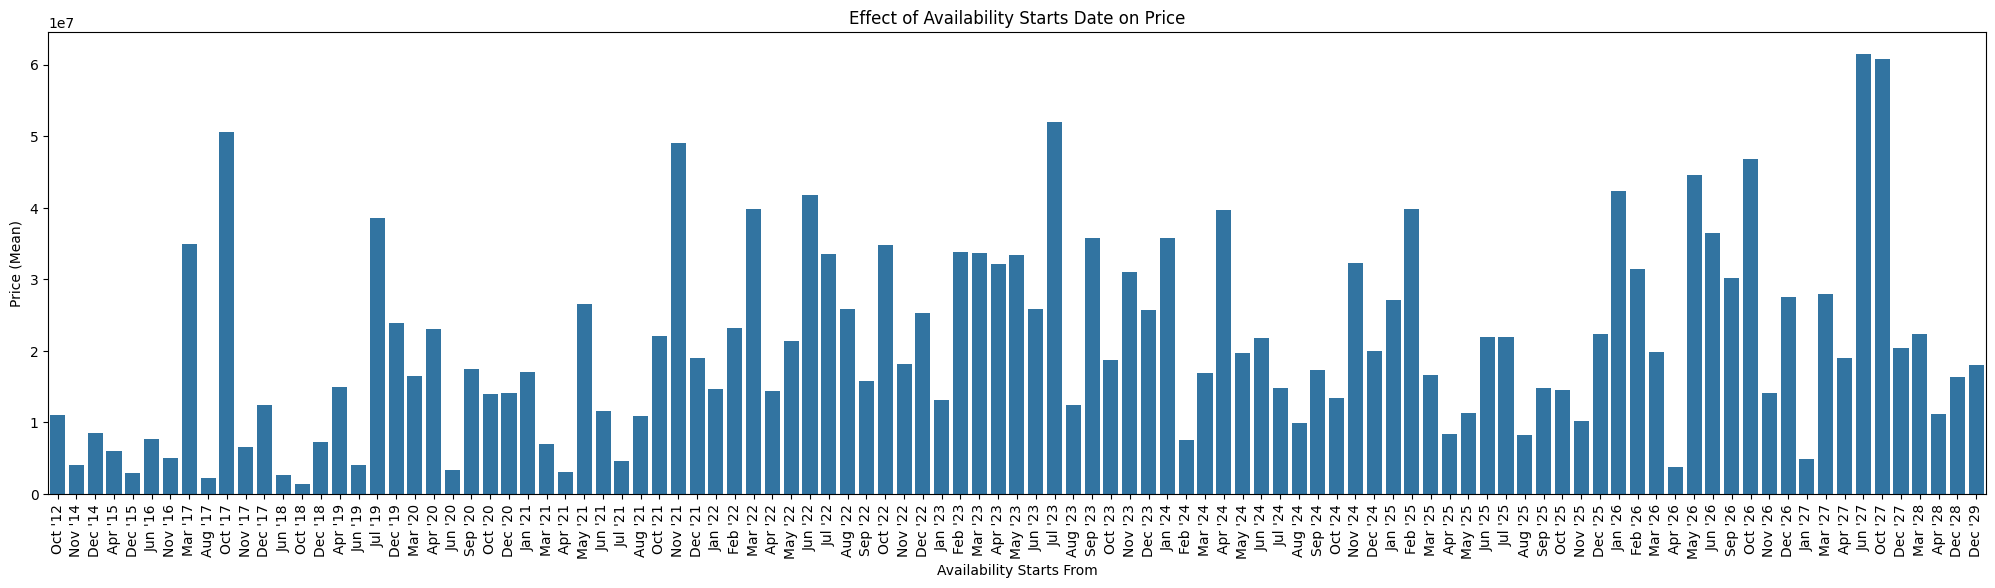

In [38]:
summary_table = get_full_data_summary(df, group_by_columns=['Availability Starts (Date)', 'Availability Starts From'], target_variable='Price')
print(tabulate(summary_table, headers='keys', tablefmt='pretty'))

fig, ax = plt.subplots(figsize=(25,6))
Plotter.plot_bar_plot(ax=ax, df=summary_table, title='Effect of Availability Starts Date on Price', x='Availability Starts From', y='Price (Mean)')
plt.show()

+---+--------+--------------------+--------------------+----------------+-------+
|   |  City  | Possession Status  |    Price (Mean)    | Price (Median) | Count |
+---+--------+--------------------+--------------------+----------------+-------+
| 0 | Mumbai |   Ready to Move    |  29019180.5029893  |   18000000.0   | 6356  |
| 1 | Mumbai | Under Construction | 28246882.562938698 |   18000000.0   | 2137  |
| 2 | Thane  |   Ready to Move    | 10975202.73110509  |   8500000.0    | 3321  |
| 3 | Thane  | Under Construction | 10190239.213245032 |   8000000.0    |  755  |
+---+--------+--------------------+--------------------+----------------+-------+


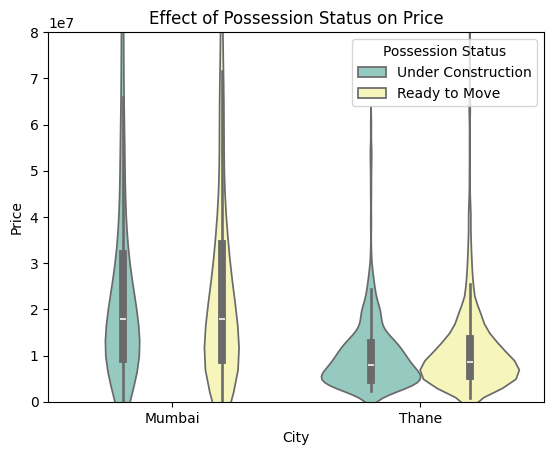

In [39]:
subset = df[(df['City'] == 'Mumbai') | (df['City'] == 'Thane')]

summary_table = get_full_data_summary(subset, group_by_columns=['City', 'Possession Status'], target_variable='Price')
print(tabulate(summary_table, headers='keys', tablefmt='pretty'))

fig, ax = plt.subplots()
Plotter.plot_multi_violin_plot(ax=ax, df=subset, title='Effect of Possession Status on Price', target_field_1='City', target_field_2='Price', hue_field='Possession Status')
ax.set_ylim(0, 0.8*1e8)
plt.show()